In [1]:
setwd("/data/wangjl/scScripts/")
getwd()

[1] "/data/wangjl/scScripts"

In [2]:
subDir="backup/a3/"
if(!dir.exists(subDir)){
    dir.create(subDir) #visual/
}

outputRoot=paste0( getwd(), "/", subDir) 
outputRoot

[1] "/data/wangjl/scScripts/backup/a3/"

ggplot2 排版:
- plotc = (p1|p2)/(p3|p4) #排序， |是左右；/是上下；

In [4]:
##
library(Seurat)
library(monocle)

library(tidyverse)
library(patchwork)

可供参考的Seurat代码:
- https://www.cnblogs.com/shanyr/p/11683505.html
- http://www.bio-info-trainee.com/7737.html

# load data

In [5]:
scRNA <- readRDS("backup/a1/pbmc10k_final.rds")
scRNA

An object of class Seurat 
22860 features across 10441 samples within 1 assay 
Active assay: RNA (22860 features)
 3 dimensional reductions calculated: pca, umap, tsne

In [6]:
head(scRNA@meta.data)

orig.ident nCount_RNA nFeature_RNA percent.mt RNA_snn_res.0.5
AAACCCAGTATCGTAC pbmc10k     1628       749          0.4299754 0              
AAACCCAGTCGGTGAA pbmc10k     6590      1867         10.3034901 13             
AAACCCAGTTAGAAAC pbmc10k    17318      3809          5.4913962 0              
AAACCCAGTTATCTTC pbmc10k     3526      1516         13.4997164 7              
AAACCCAGTTGCCGAC pbmc10k     6228      2110          6.0533076 0              
AAACCCAGTTTCCCAC pbmc10k    22044      4598          6.5278534 9              
                 seurat_clusters cellType  
AAACCCAGTATCGTAC 0               CD14+ Mono
AAACCCAGTCGGTGAA 13              CD8 T     
AAACCCAGTTAGAAAC 0               CD14+ Mono
AAACCCAGTTATCTTC 7               NK        
AAACCCAGTTGCCGAC 0               CD14+ Mono
AAACCCAGTTTCCCAC 9               CD14+ Mono

In [7]:
levels( scRNA@meta.data$seurat_clusters )

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15" "16" "17" "18" "19"

In [8]:
levels(Idents(scRNA))

[1] "CD14+ Mono"   "Naive CD4 T"  "CD8 T"        "Memory CD4 T" "FCGR3A+ Mono"
 [6] "B"            "NK"           "DC"           "CD4+ CTL"     "?"           
[11] "Platelet"

In [9]:
levels(scRNA@active.ident)

[1] "CD14+ Mono"   "Naive CD4 T"  "CD8 T"        "Memory CD4 T" "FCGR3A+ Mono"
 [6] "B"            "NK"           "DC"           "CD4+ CTL"     "?"           
[11] "Platelet"

## change active.ident

In [38]:
scRNA0=(function(){    
    #
    named=factor(scRNA@meta.data$seurat_clusters)
    names(named)=rownames( scRNA@meta.data )
    #
    scRNA2=scRNA
    scRNA2@active.ident=named
    print(levels(scRNA2@active.ident))
    scRNA2
})()
scRNA0

 [1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15" "16" "17" "18" "19"


An object of class Seurat 
22860 features across 10441 samples within 1 assay 
Active assay: RNA (22860 features)
 3 dimensional reductions calculated: pca, umap, tsne

In [6]:
# 更简单的修改方式，直接指定 meta.data 中的列明
Idents(scRNA)="seurat_clusters"
levels(scRNA@active.ident)

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15" "16" "17" "18" "19"

## FindAllMarkers

In [90]:
diff_genes_wilcox=FindAllMarkers(scRNA0) #10 min: 11:46 - 
dim(diff_genes_wilcox)
head(diff_genes_wilcox)

# write to file
pbmc.markers=diff_genes_wilcox
top10 <- pbmc.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
dim(top10)

write.csv(top10, paste0(outputRoot, "top10_diff_genes_wilcox.csv"))

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19



[1] 23493     7

p_val avg_logFC pct.1 pct.2 p_val_adj cluster gene   
S100A8  0     3.203883  1.000 0.410 0         0       S100A8 
S100A9  0     3.058732  1.000 0.565 0         0       S100A9 
LYZ     0     2.636891  1.000 0.569 0         0       LYZ    
S100A12 0     2.248656  0.950 0.093 0         0       S100A12
VCAN    0     2.211116  0.973 0.147 0         0       VCAN   
MNDA    0     2.205240  0.999 0.227 0         0       MNDA

# visual functions

Seurat自带一些优秀的可视化工具:

- 函数  singleGene,  MultipleGenes, DimentionReduction, ClusterInformation;
- RidgePlot: S -- C
- VlnPlot: S -- C
- FeaturePlot: - M - C
- DotPlot: -M-C
- FeatureScatter: -M-C
- DimPlot: -- D C


## DimPlot 降维图

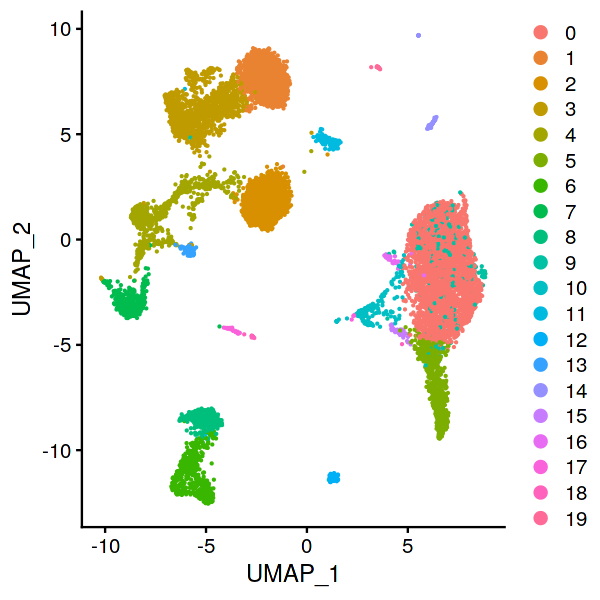

In [44]:
DimPlot(scRNA0) #默认是UMAP降维

### 控制长宽比(jupyter)

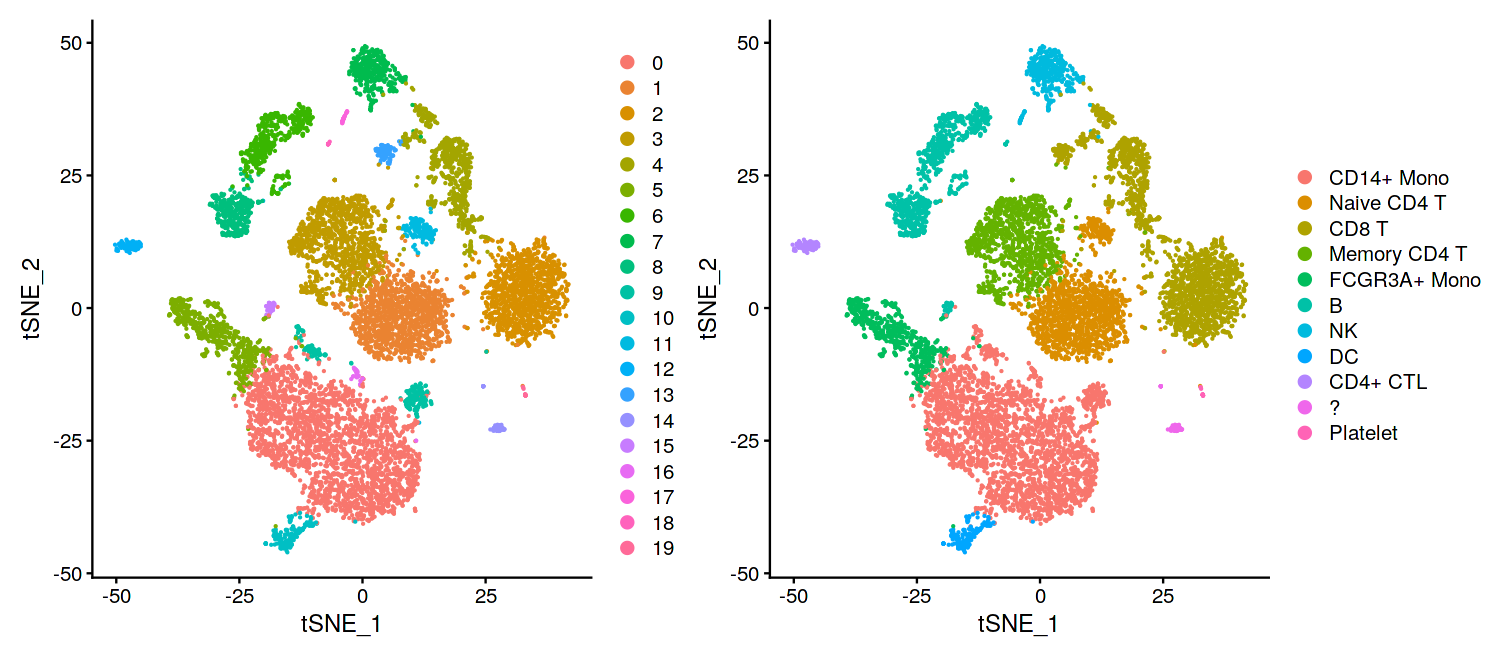

In [39]:
# tSNE，默认参数
options(repr.plot.width=12.5, repr.plot.height=5.5) #控制长宽比，和pdf的类似
p0=DimPlot(scRNA0, reduction = 'tsne')
p1=DimPlot(scRNA, reduction = 'tsne')
pc=p0|p1 
pc

### cluster标签标在图中

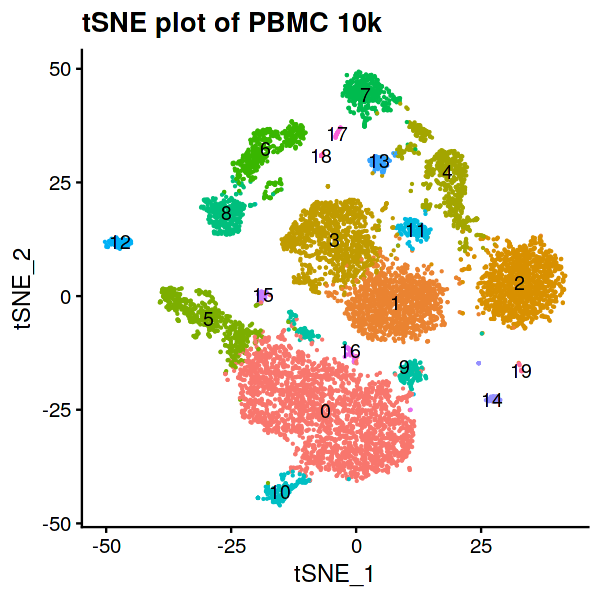

In [43]:
options(repr.plot.width=5, repr.plot.height=5)

# cluster标签显示到图中
library(ggplot2)
DimPlot(scRNA0, reduction = 'tsne',
       label=T, #图中添加编号
       )+
    labs(title="tSNE plot of PBMC 10k")+ #添加标题
    NoLegend() #不要图例

### 自定义颜色

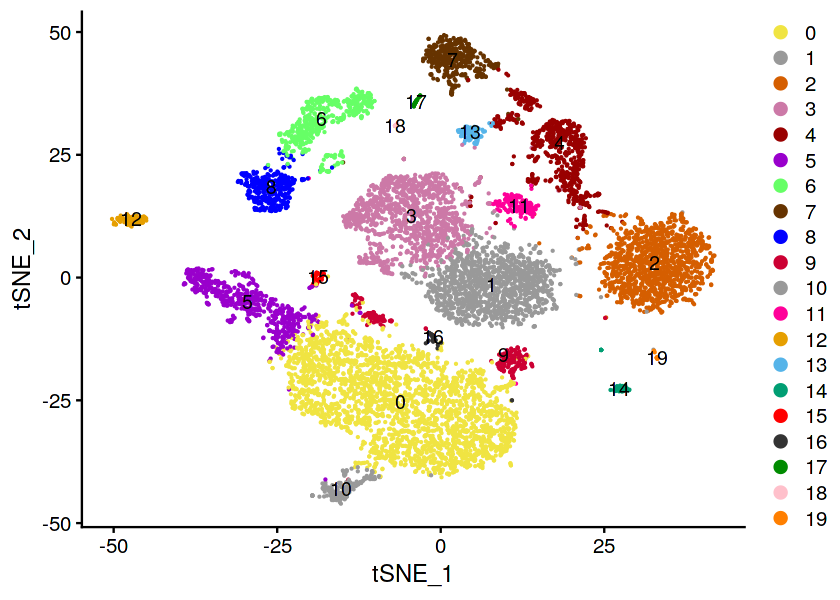

In [213]:
options(repr.plot.width=7, repr.plot.height=5)

# 自定义颜色
colSet=c(
    "#F0E442", "#999999", "#D55E00", "#CC79A7","#990000","#9900CC","#66FF66","#663300","#0000FF",
 "#CC0033","#999999","#FF0099", "#E69F00", "#56B4E9", "#009E73","#FF0000","#333333",
#
'green4', 'pink', '#FF7F00', 'orchid', '#99c9fb', 'dodgerblue2', 'grey30', 'yellow', 'grey60', 
'grey', 'red', '#FB9A99','black' )

DimPlot(scRNA0,reduction = "tsne", 
        label=T,
        cols =colSet[1:20] )

### 多列图例

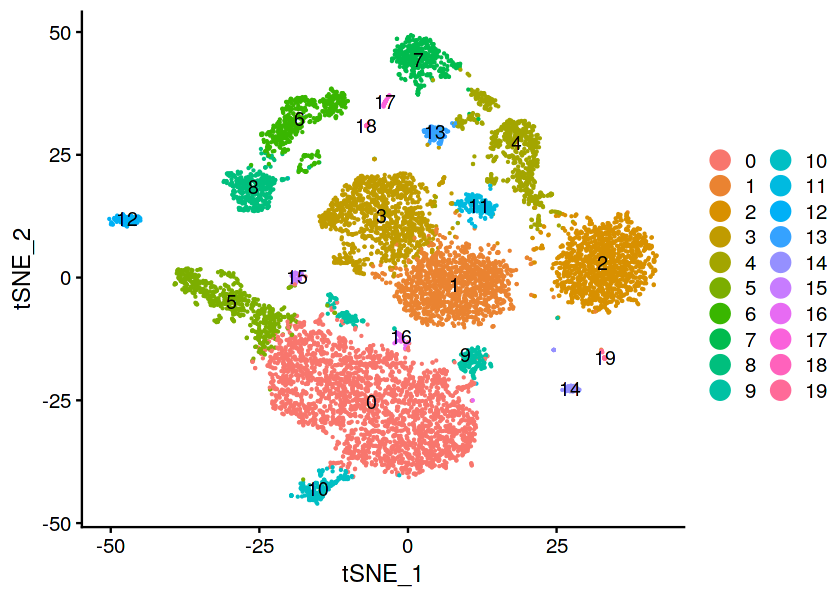

In [101]:
options(repr.plot.width=7, repr.plot.height=5)
DimPlot(scRNA,reduction = "tsne", 
    label=T)+
    #guides( color = guide_legend(ncol=2))+ #图例两列
    guides( color = guide_legend(ncol=2, override.aes = list(size=5))) #放大图例

### 指定着色方法 group.by

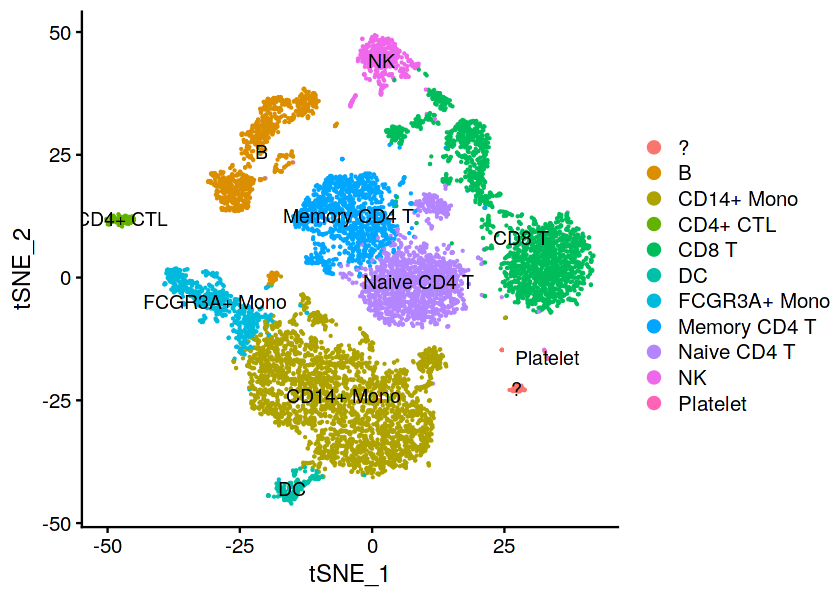

In [133]:
options(repr.plot.width=7, repr.plot.height=5)

DimPlot(scRNA0, reduction = 'tsne', group.by = "cellType", label=T)

## VlnPlot小提琴图

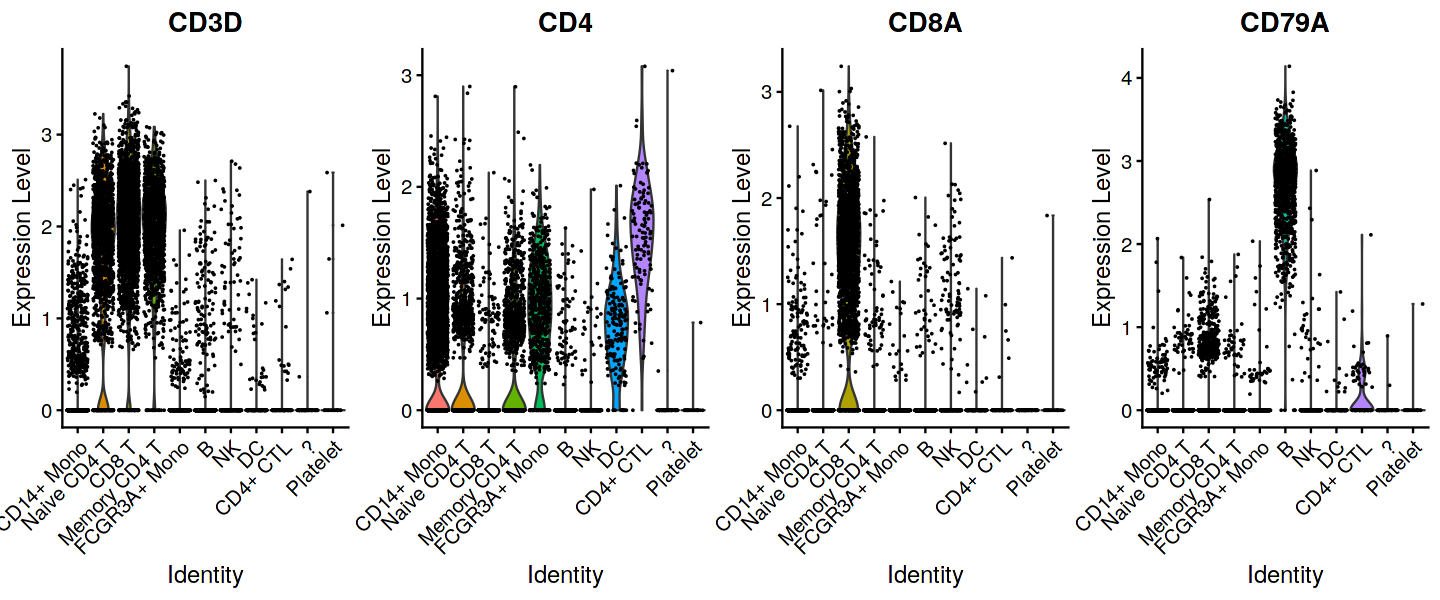

In [51]:
options(repr.plot.width=12, repr.plot.height=5)

VlnPlot(scRNA, features =c("CD3D","CD4", "CD8A","CD79A"), ncol = 4,
        pt.size = 0.01  #控制点的大小
       ) 

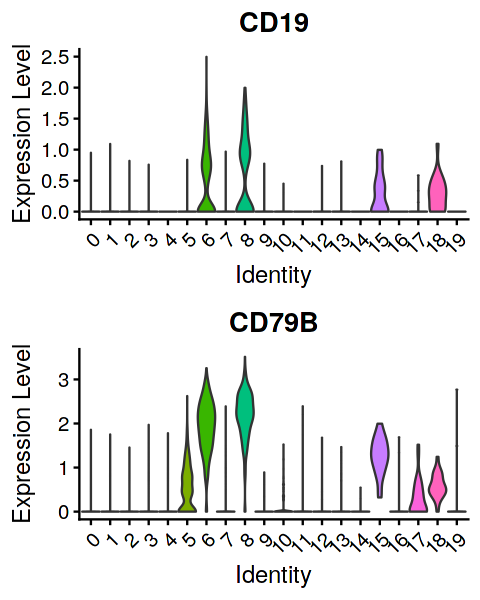

In [186]:
options(repr.plot.width=4, repr.plot.height=5)
VlnPlot(scRNA0, features =c("CD19", "CD79B"), ncol = 1, pt.size = 0 ) 

### 共用图例

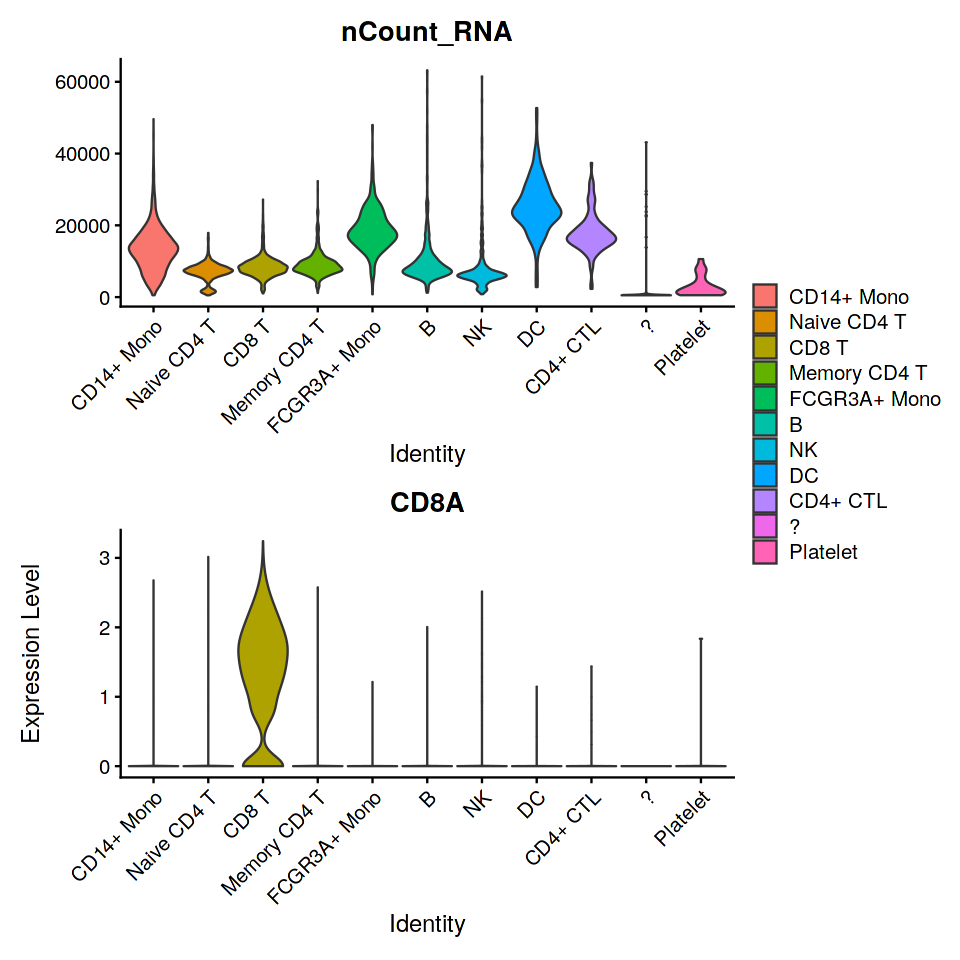

In [53]:
p1 = VlnPlot(scRNA, features = "nCount_RNA", pt.size = 0) #0表示不要点
p2 = VlnPlot(scRNA, features = "CD8A", pt.size = 0)
plotc = p1/p2 + plot_layout(guides = 'collect') #公用图例

options(repr.plot.width=8, repr.plot.height=8)
plotc

ggsave( paste0(outputRoot, '01_vlnplot_eg.pdf'), plotc, width = 8,height = 8)

结论: 图中?RNA很少，很可能是细胞碎片，可以去掉了。

### 批量小提琴图

In [214]:
table(scRNA@active.ident, scRNA@meta.data$seurat_clusters)

              
                  0    1    2    3    4    5    6    7    8    9   10   11   12
  CD14+ Mono   2807    0    0    0    0    0    0    0    0  232    0    0    0
  Naive CD4 T     0 1322    0    0    0    0    0    0    0    0    0  170    0
  CD8 T           0    0 1252    0  744    0    0    0    0    0    0    0    0
  Memory CD4 T    0    0    0 1242    0    0    0    0    0    0    0    0    0
  FCGR3A+ Mono    0    0    0    0    0  654    0    0    0    0    0    0    0
  B               0    0    0    0    0    0  542    0  389    0    0    0    0
  NK              0    0    0    0    0    0    0  437    0    0    0    0    0
  DC              0    0    0    0    0    0    0    0    0    0  188    0    0
  CD4+ CTL        0    0    0    0    0    0    0    0    0    0    0    0  113
  ?               0    0    0    0    0    0    0    0    0    0    0    0    0
  Platelet        0    0    0    0    0    0    0    0    0    0    0    0    0
              
          

In [263]:
# 准备数据1
gene_list1=c(
    "CD3D","CD3E", "CD4", #naive CD4
    'CD8A','CD8B', #CD8
    "S100A4",  #mem CD4
    "NKG7","GNLY", "NCR3","PRF1","GZMB","GZMK", #NK
    "GZMH", "GZMA","GZMM",
    "CD14",'LYZ', "FCGR3A", #mono
    "MS4A1",'CD79A',"CD79B","CD19","IGHG1","IGHA1", #B
    "FCER1A", #DC
    "PPBP","TUBB1","GAPDH", #Platelet
    "FOXP3", "IL2RA", "HLA-DRB1", "HLA-DPB1", "IFNG","TNFRSF4", #"OX40",
    "ITGB1","CCR7", "LTB", "KLRB1",
    "JUN" #发育过程
)

cluster_list=levels(scRNA@meta.data$seurat_clusters)
cluster_list

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15" "16" "17" "18" "19"

In [266]:
# 准备数据2
df1=NULL;
for( cluster in cluster_list){
    message(cluster)
    rs=scRNA@meta.data
    cid=rownames( rs[which(rs$seurat_clusters== cluster),] )
    #
    mtx=scRNA@assays$RNA@data[, cid]
    for( gene in gene_list1){
        df2=data.frame(value=as.numeric( mtx[gene, ]) )
        df2$variable=gene
        df2$seurat_clusters=cluster
        #
        df1=rbind(df1, df2)
    }
}
rm(cluster, rs, df2)

dim(df1)
head(df1)

0

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19



[1] 407199      3

value variable seurat_clusters
1 0     CD3D     0              
2 0     CD3D     0              
3 0     CD3D     0              
4 0     CD3D     0              
5 0     CD3D     0              
6 0     CD3D     0

In [270]:
# as factor
df1$seurat_clusters=factor(df1$seurat_clusters, levels=c(0:19))
table(df1$seurat_clusters)


df1$variable=factor(df1$variable, levels=gene_list1)
table(df1$variable)


     0      1      2      3      4      5      6      7      8      9     10 
109473  51558  48828  48438  29016  25506  21138  17043  15171   9048   7332 
    11     12     13     14     15     16     17     18     19 
  6630   4407   4251   2847   1794   1677   1248    897    897 


    CD3D     CD3E      CD4     CD8A     CD8B   S100A4     NKG7     GNLY 
   10441    10441    10441    10441    10441    10441    10441    10441 
    NCR3     PRF1     GZMB     GZMK     GZMH     GZMA     GZMM     CD14 
   10441    10441    10441    10441    10441    10441    10441    10441 
     LYZ   FCGR3A    MS4A1    CD79A    CD79B     CD19    IGHG1    IGHA1 
   10441    10441    10441    10441    10441    10441    10441    10441 
  FCER1A     PPBP    TUBB1    GAPDH    FOXP3    IL2RA HLA-DRB1 HLA-DPB1 
   10441    10441    10441    10441    10441    10441    10441    10441 
    IFNG  TNFRSF4    ITGB1     CCR7      LTB    KLRB1      JUN 
   10441    10441    10441    10441    10441    10441    10441 

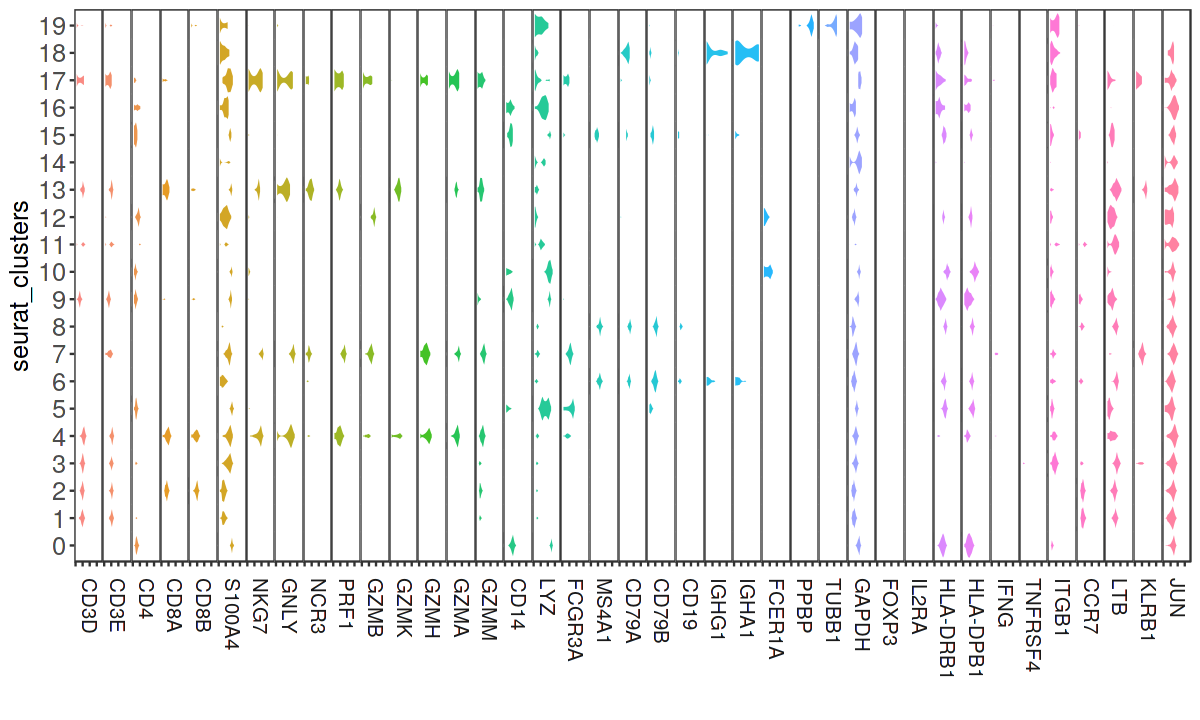

In [334]:
#2. 旋转小提琴图（不能看，请看下面一个版本）
p2 = ggplot(df1,aes(x=seurat_clusters,y=value,fill=variable))+
  geom_violin(scale = "width", colour="white", alpha=0.85, width=1) +
  coord_flip() + #guides(fill=FALSE)
    labs(y="")+
  facet_wrap(variable~., nrow = 1, strip.position = "bottom") + 
  theme_bw() +
  theme(
        panel.grid = element_blank(), #不要背景网格
        axis.text.x = element_blank(), #不要x坐标轴刻度文字

        axis.text.y = element_text(size=15), #y坐标刻度字号
        axis.title.y = element_text(size=15), #y标题字号
        
        legend.position = "none", #不要图例
        panel.spacing=unit(0,"cm"), #分面的间距
    
        strip.placement = "outside", #分面标签位置
        strip.text.x = element_text(angle=-90,vjust=0,hjust = 0,size=12), #分面标签 文字倾斜; 字号
        strip.background = element_blank() #分面标签 不要背景
    )

options(repr.plot.width=10, repr.plot.height=6)
print(p2) #不好：有些小提琴图整列都太低，顶部空了很多空白。

#### 继续美化(V2.0): scales ="free_x"

In [296]:
# 使用 df2 做测试，使用 df1 做图
df2=df1[which(df1$seurat_clusters %in% c(0,1,2,3) ),]

df2$seurat_clusters=factor( as.character(df2$seurat_clusters) )
head(df2)
str(df2)

value variable seurat_clusters
1 0     CD3D     0              
2 0     CD3D     0              
3 0     CD3D     0              
4 0     CD3D     0              
5 0     CD3D     0              
6 0     CD3D     0

'data.frame':	258297 obs. of  3 variables:
 $ value          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ variable       : Factor w/ 39 levels "CD3D","CD3E",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters: Factor w/ 4 levels "0","1","2","3": 1 1 1 1 1 1 1 1 1 1 ...


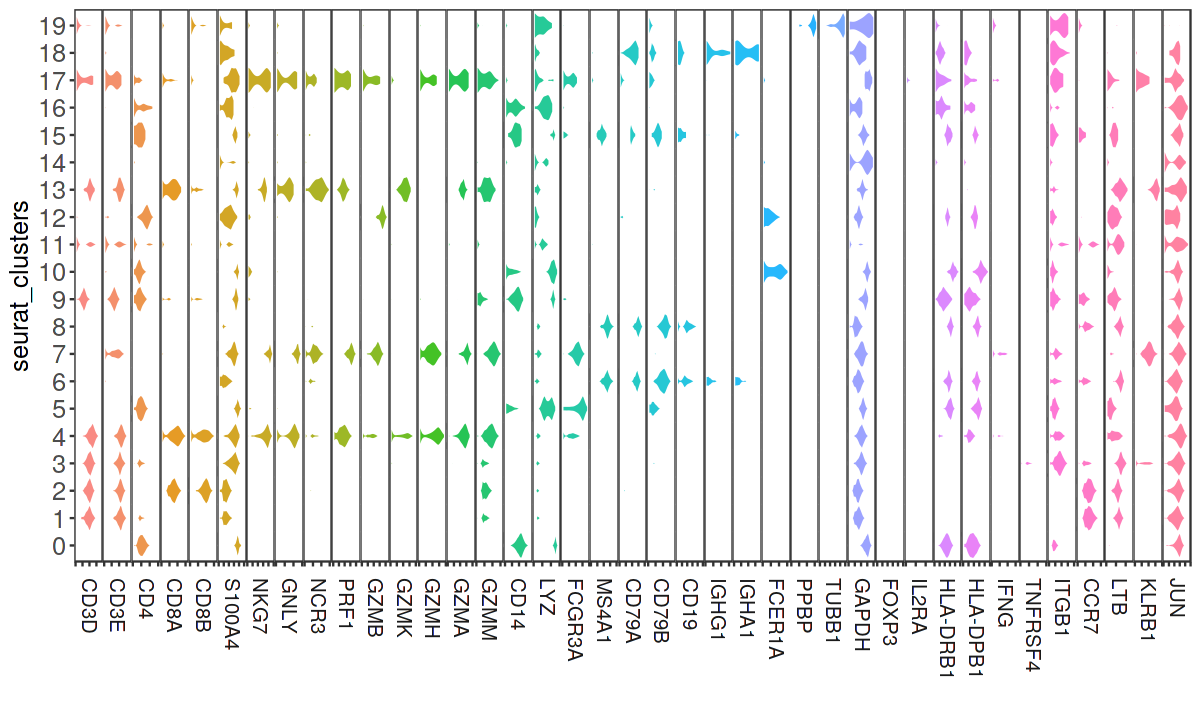

In [335]:
# 重要参数: scales ="free_x"
p3=ggplot(df1, aes(x=seurat_clusters,y=value,fill=variable)) +
    geom_violin(scale = "width", colour="white", alpha=0.85, width=1) +
    coord_flip()+  #guides(fill=FALSE)
    facet_wrap(variable~., nrow = 1,
               scales ="free_x", #自由化某个坐标，就是facet之间，该坐标的范围不一定要一致
               strip.position = "bottom") + 
    theme_bw() + labs(y="")+
    theme(
        panel.grid = element_blank(), #不要背景网格
        axis.text.x = element_blank(), #不要x坐标轴刻度文字

        axis.text.y = element_text(size=15), #y坐标刻度字号
        axis.title.y = element_text(size=15), #y标题字号

        legend.position = "none", #不要图例
        panel.spacing=unit(0,"cm"), #分面的间距

        strip.placement = "outside", #分面标签位置
        strip.text.x = element_text(angle=-90,vjust=0,hjust = 0,size=12), #分面标签 文字倾斜; 字号
        strip.background = element_blank() #分面标签 不要背景
    )
##
options(repr.plot.width=10, repr.plot.height=6)
p3

### 堆叠小提琴图(Seurat 3.2）

In [ ]:
# https://rpubs.com/DarrenVan/628853  效果不好，上下距离太大
# https://satijalab.org/signac/articles/pbmc_vignette.html
# https://ycl6.github.io/StackedVlnPlot/

library(Seurat)
library(ggplot2)

# Load Seurat obj
pbmc <- scRNA #readRDS("data/pbmc_2k_v3_Seurat.rds")

features <- c("CD79A", "MS4A1", "CD8A", "CD8B", "LYZ", "LGALS3", "S100A8", "GNLY",
              "NKG7", "KLRB1", "FCGR3A", "FCER1A", "CST3")

a <- VlnPlot(pbmc, features, stack = TRUE, sort = TRUE) + #Seurat 3.2 才有这两个参数
        theme(legend.position = "none") + ggtitle("identities on y-axis")
a

### lapply批量画(原始版)

[1] 39


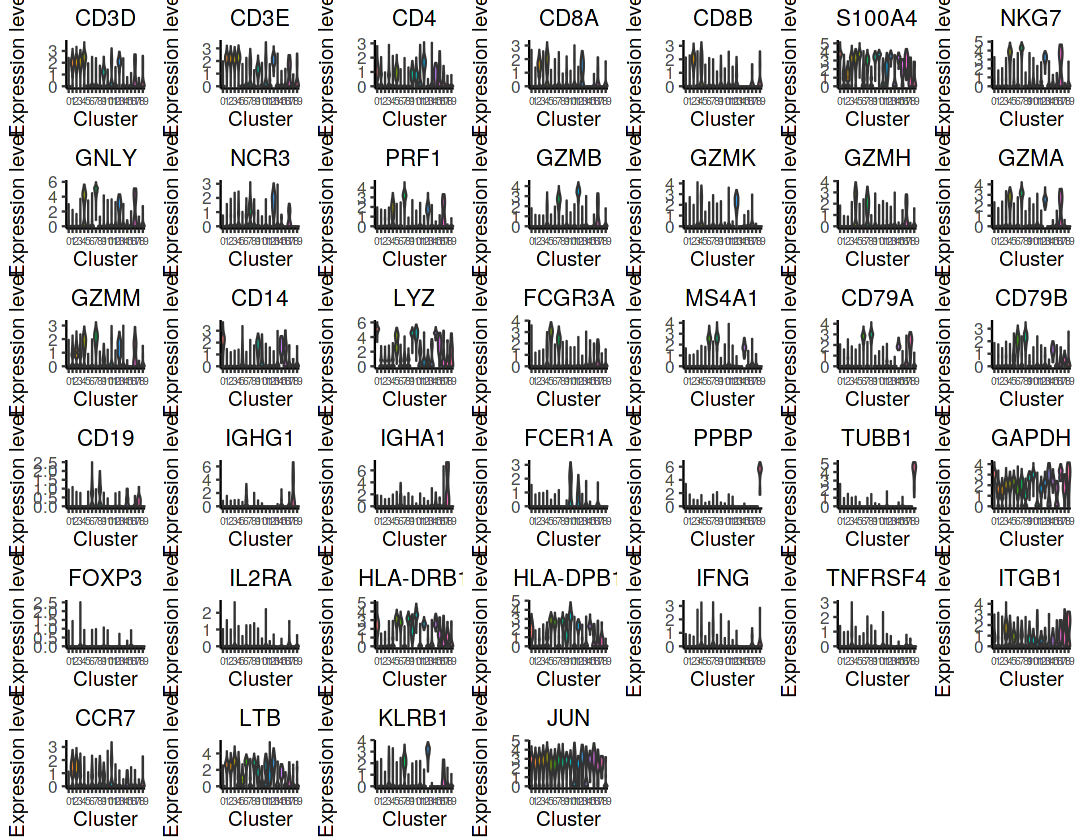

In [291]:
VisualizeVlnplot <- function(genes, SeuratObj, ncol = NULL, width = 6, height = 4, outputRoot = ""){
    genes = intersect(unique(genes), rownames(SeuratObj)) #谁在前，按照谁的顺序返回。
    print(length(genes)) #39
    
    gene_expr = GetAssayData(object = SeuratObj)[genes, ] #表达矩阵
    cell_cluster = Idents(SeuratObj)
    # 循环画图
    vlnplots = lapply(genes, function(x){
        expr_cluster = merge(cell_cluster, as.data.frame(gene_expr[x, ]), by.x = 0, by.y = 0)
        row.names(expr_cluster) = expr_cluster[,1] #行名是第1列
        expr_cluster = expr_cluster[,-1] #只剩下单列表达值，
        #
        colnames(expr_cluster) = c("Cluster","Gene") # 列名
        expr_cluster$Cluster = as.factor(expr_cluster$Cluster) # 转为因子
        ytitle = "Expression level"
        p = ggplot(expr_cluster, aes(Cluster, Gene)) + 
          geom_violin(aes(fill = Cluster), show.legend = FALSE, scale = "width") + 
          labs(y = ytitle, title = x) +
          theme(axis.text.x = element_text(size = 6), axis.text.y = element_text(size = 10), 
                axis.title = element_text(size = 12), plot.title = element_text(hjust = 0.5),
                panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                panel.background = element_blank(), axis.line = element_line(colour = "black"))
        return(p)
    })
    
    combinedplot = CombinePlots(vlnplots, ncol = ncol)
    ggsave(paste0(outputRoot,"02_vlnplot.pdf"), combinedplot,  width=width, height=height)
    return(combinedplot)
}

p=VisualizeVlnplot(gene_list1, scRNA0, outputRoot=outputRoot, width=20, height=20)
p

In [292]:
# change w and h, if necessary
ggsave(paste0(outputRoot,"02_vlnplot.pdf"), p,  width=20, height=10)

## FeaturePlot特征图

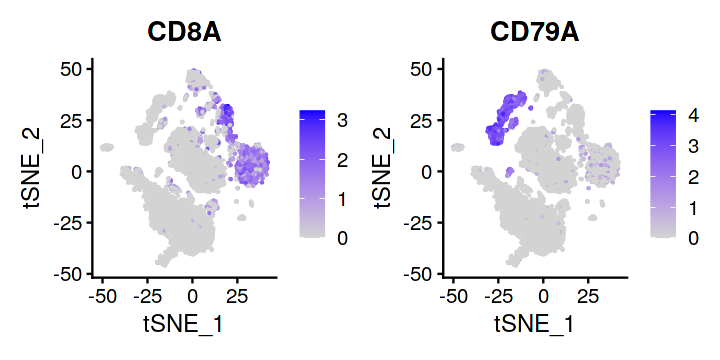

In [55]:
p1 <- FeaturePlot(scRNA,features = "CD8A", reduction = 'tsne')
p2 <- FeaturePlot(scRNA,features = "CD79A", reduction = 'tsne')
plotc = p1|p2

options(repr.plot.width=6, repr.plot.height=3)
plotc

ggsave( paste0(outputRoot,'01_featureplot_eg.pdf'), plotc, width = 6, height = 3)

## DotPlot点图

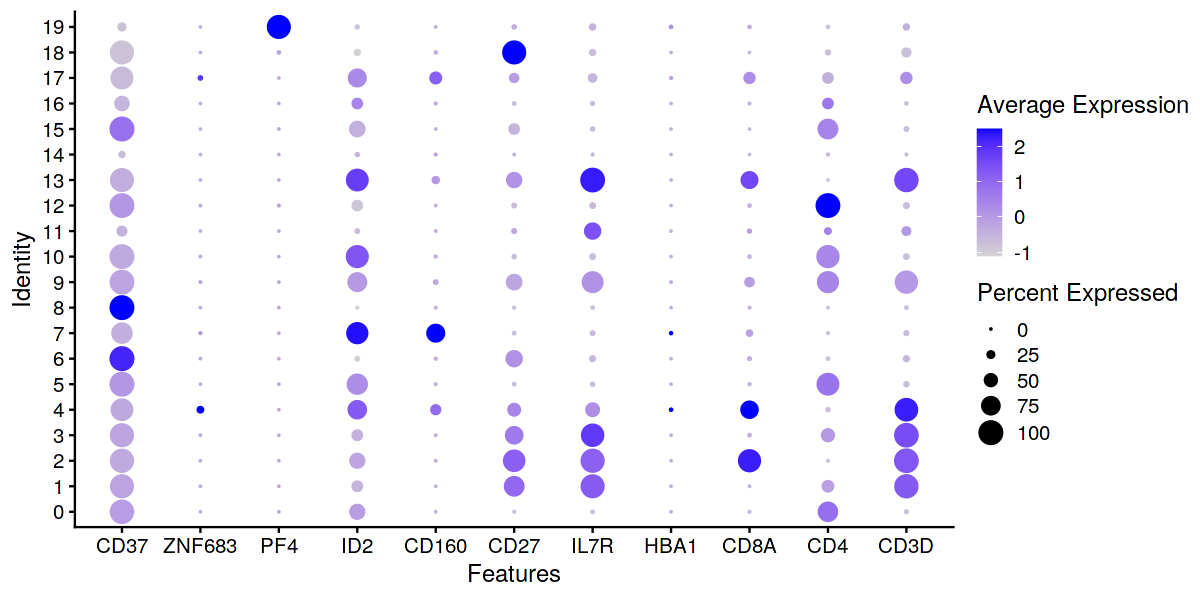

In [206]:
options(repr.plot.width=10, repr.plot.height=5)

DotPlot(scRNA0, features = c("CD3D","CD4","CD8A",'HBA1',"IL7R",'CD27', "CD160","ID2","PF4",'ZNF683',
                            "CD37"))

### X坐标倾斜60度(PBMC marker)

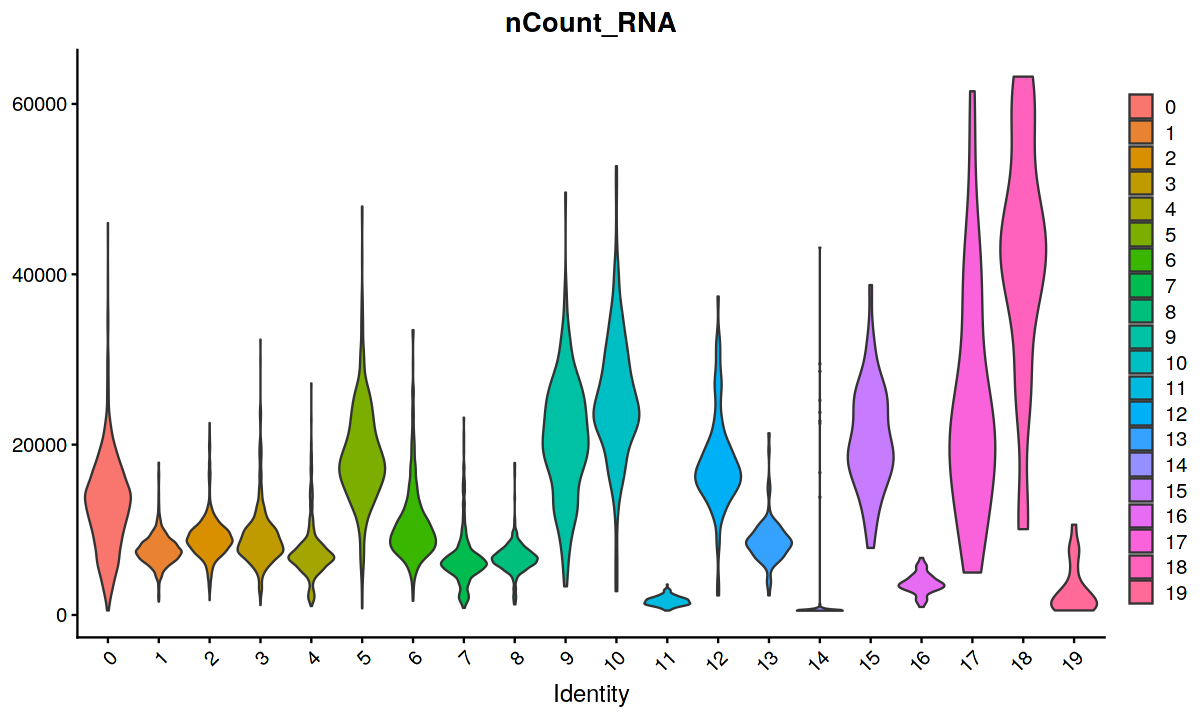

In [89]:
VlnPlot(scRNA0, features = "nCount_RNA", pt.size = 0)
# c11,14,16,19可以整体去掉了。

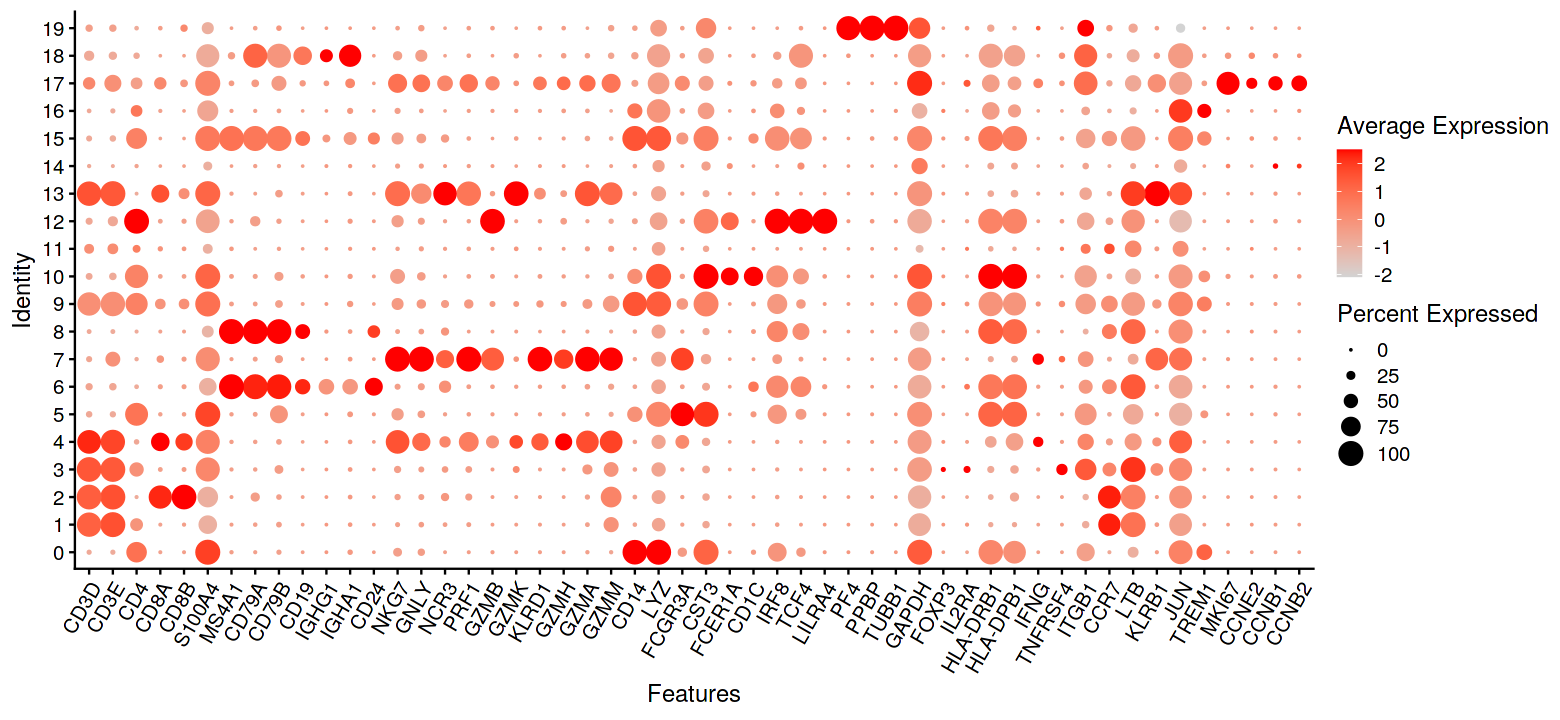

In [86]:
genelist.byHand = c(
    "CD3D","CD3E", "CD4", #naive CD4
    'CD8A','CD8B', #CD8
    "S100A4",  #mem CD4
    "MS4A1",'CD79A',"CD79B","CD19","IGHG1","IGHA1","CD24", #B
    
    "NKG7","GNLY", "NCR3","PRF1","GZMB","GZMK","KLRD1", #NK
    "GZMH", "GZMA","GZMM", 
    "CD14",'LYZ', "FCGR3A", #mono
    
    "CST3", # DC 
    "FCER1A", 'CD1C', #DC
    "IRF8", "TCF4", "LILRA4", #pDC
    "PF4", "PPBP","TUBB1","GAPDH", #Platelet
    "FOXP3", "IL2RA", "HLA-DRB1", "HLA-DPB1", "IFNG","TNFRSF4", #"OX40",
    "ITGB1","CCR7", "LTB", "KLRB1","JUN", #发育过程
    
    # TREM1 (Triggering Receptor Expressed On Myeloid Cells 1) 
    "TREM1", #16 expressed on myeloid cells.
    #Stimulates neutrophil and monocyte-mediated inflammatory responses. 
    
    "MKI67","CCNE2","CCNB1","CCNB2") #cell cycle

# 这些标记基因在不同亚群细胞的表达量热图或者小提琴图展示一下，
# 就明白了为什么它们可以作为标记基因，来对细胞亚群进行命名了。

genelist.byHand=unique(genelist.byHand)

p = DotPlot(scRNA, features = rev( genelist.byHand ) , 
            cols = c("lightgrey", "red"))+ #自定义颜色
    theme( axis.text.x = element_text(angle = 60, vjust = 1, hjust = 1) )

options(repr.plot.width=13, repr.plot.height=6)
p

ggsave( paste0(outputRoot,'01_dotplot_eg.pdf'), p, width = 12, height = 6)

分类推断如下
- 没有特征: c11, c14, c16,结合RNA per cell,可以认定为细胞碎片。

- CD3D+:
    - CD4:
        - c1: Naive CD4 (CCR7+)
        - c3: CD4: 部分Treg, 感觉是个混合类
        - c9: CD4 CTL(CD14+ LYZ+)
    - CD8A:
        - c2: Naive CD8(CCR7+)
        - c4: CD8 CTL: IFNG+
        - c13: NKT(GZMK++, NCR3+)
- CD79A:
    - c6: mature B (IGHG1+) transitional B cell / Plasmablast
    - c8: naive B (CCR7+)
    - c15: mem B(S100A4+) ??
    - c18: plasma B( MS4A1(CD20)-, IGHA1++) ??
- NKG7+NCR3+, GZMB+ IFNG+:
    - c7: NK
    - c17: NK (MKI67+) 周期活跃
- monocyte:
    - CD14+LYZ+: c0, (c15 ??)
    - FCGR3A+: c5
- DC:
    - c10: (CD1C DC) FCER1A+, HLA+++
    - c12:(pDC) CD3-, CD4+++, HLA+ GZMB+
        - Plasmacytiod dendritic cell	IRF8, TCF4, LILRA4 *
- PPBP: 
    - c19:  血小板 Platelet

- 无法分类
    - c15: B(CD20+), monocyte(CD14+)?

### 每类的细胞数 barplot

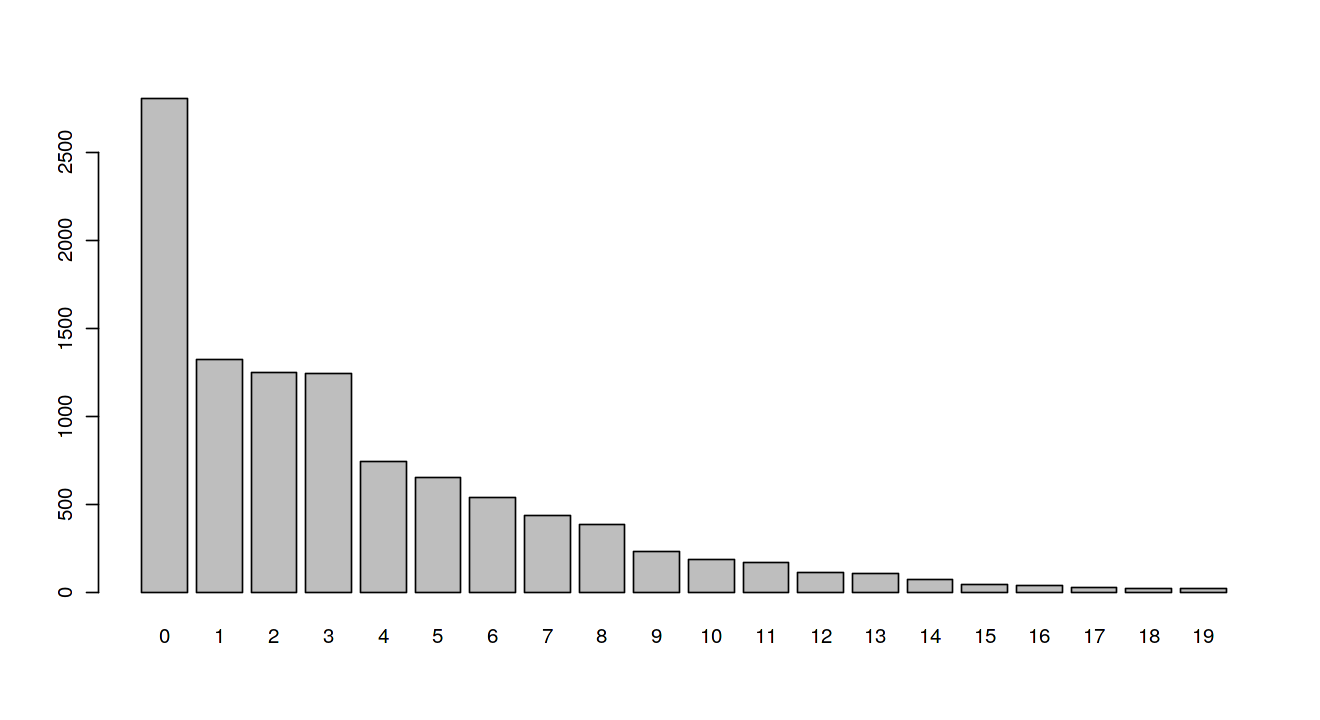

In [191]:
barplot(table(scRNA0@meta.data$seurat_clusters))

### Y坐标使用其他标签

In [111]:
head(scRNA@meta.data)

orig.ident nCount_RNA nFeature_RNA percent.mt RNA_snn_res.0.5
AAACCCAGTATCGTAC pbmc10k     1628       749          0.4299754 0              
AAACCCAGTCGGTGAA pbmc10k     6590      1867         10.3034901 13             
AAACCCAGTTAGAAAC pbmc10k    17318      3809          5.4913962 0              
AAACCCAGTTATCTTC pbmc10k     3526      1516         13.4997164 7              
AAACCCAGTTGCCGAC pbmc10k     6228      2110          6.0533076 0              
AAACCCAGTTTCCCAC pbmc10k    22044      4598          6.5278534 9              
                 seurat_clusters cellType  
AAACCCAGTATCGTAC 0               CD14+ Mono
AAACCCAGTCGGTGAA 13              CD8 T     
AAACCCAGTTAGAAAC 0               CD14+ Mono
AAACCCAGTTATCTTC 7               NK        
AAACCCAGTTGCCGAC 0               CD14+ Mono
AAACCCAGTTTCCCAC 9               CD14+ Mono

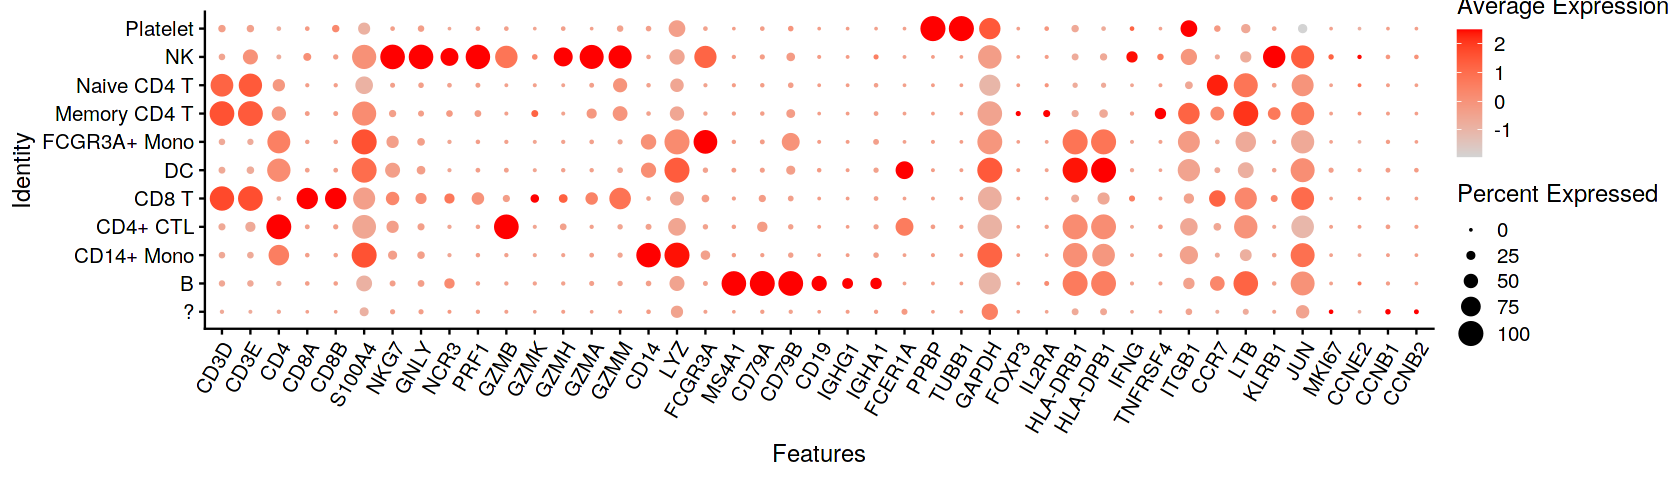

In [198]:
options(repr.plot.width=14, repr.plot.height=4)

DotPlot(scRNA, features = rev( genelist.byHand ) , 
        group.by="cellType",  ## 默认使用 seurat_clusters列，设置使用 cellType 列。
            cols = c("lightgrey", "red"))+ #自定义颜色
    theme( axis.text.x = element_text(angle = 60, vjust = 1, hjust = 1) )
# 这个分类不准确，仅供绘图示例

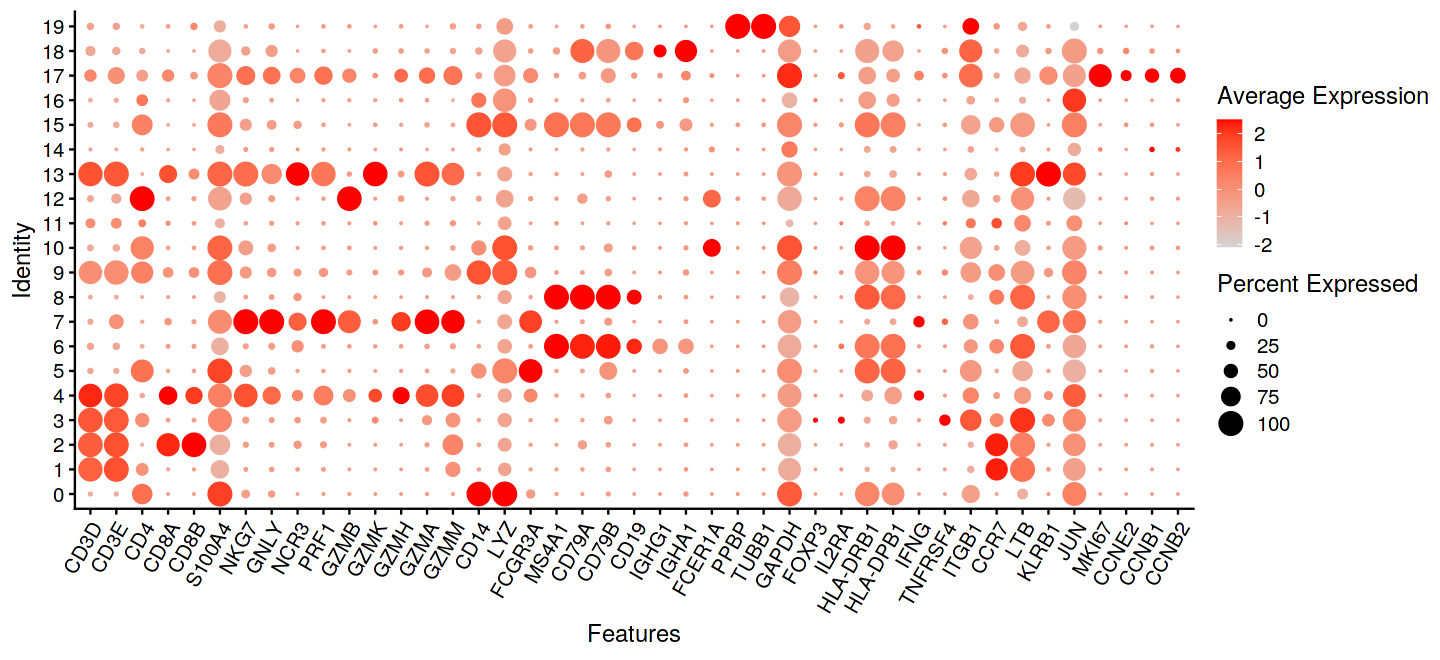

In [199]:
options(repr.plot.width=12, repr.plot.height=5.5)
DotPlot(scRNA, features = rev( genelist.byHand ) , 
        group.by="seurat_clusters",  ## 默认使用 active.ident=seurat_clusters 列，设置使用 cellType 列。
            cols = c("lightgrey", "red"))+ #自定义颜色
    theme( axis.text.x = element_text(angle = 60, vjust = 1, hjust = 1) )

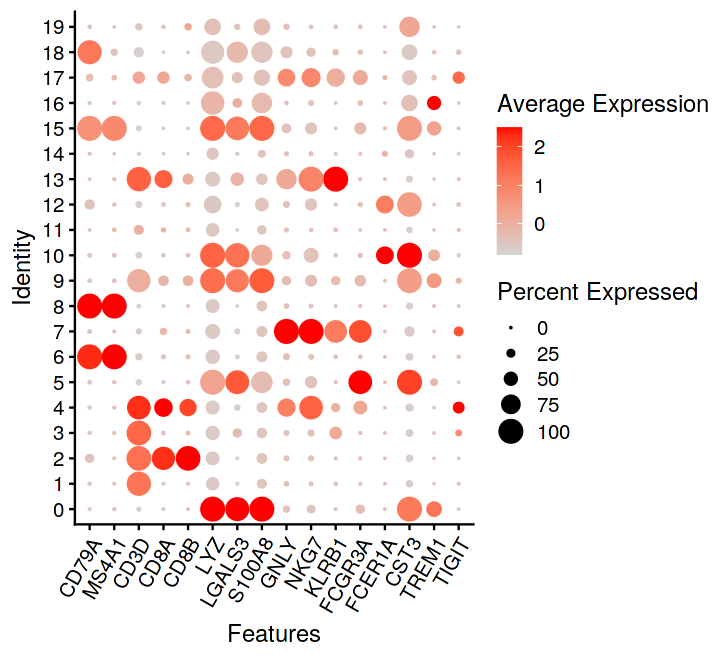

In [66]:
options(repr.plot.width=6, repr.plot.height=5.5)

features<- c("CD79A", "MS4A1", "CD3D","CD8A", "CD8B", "LYZ", "LGALS3", "S100A8", "GNLY",
             "NKG7", "KLRB1", "FCGR3A", "FCER1A", "CST3","TREM1", "TIGIT")

DotPlot(scRNA, features = rev(features),
    cols = c("lightgrey", "red"))+ #自定义颜色
    theme( axis.text.x = element_text(angle = 60, vjust = 1, hjust = 1) )

## DoHeatmap热图

[1] "S100A8"  "S100A9"  "LYZ"     "S100A12" "VCAN"    "MNDA"

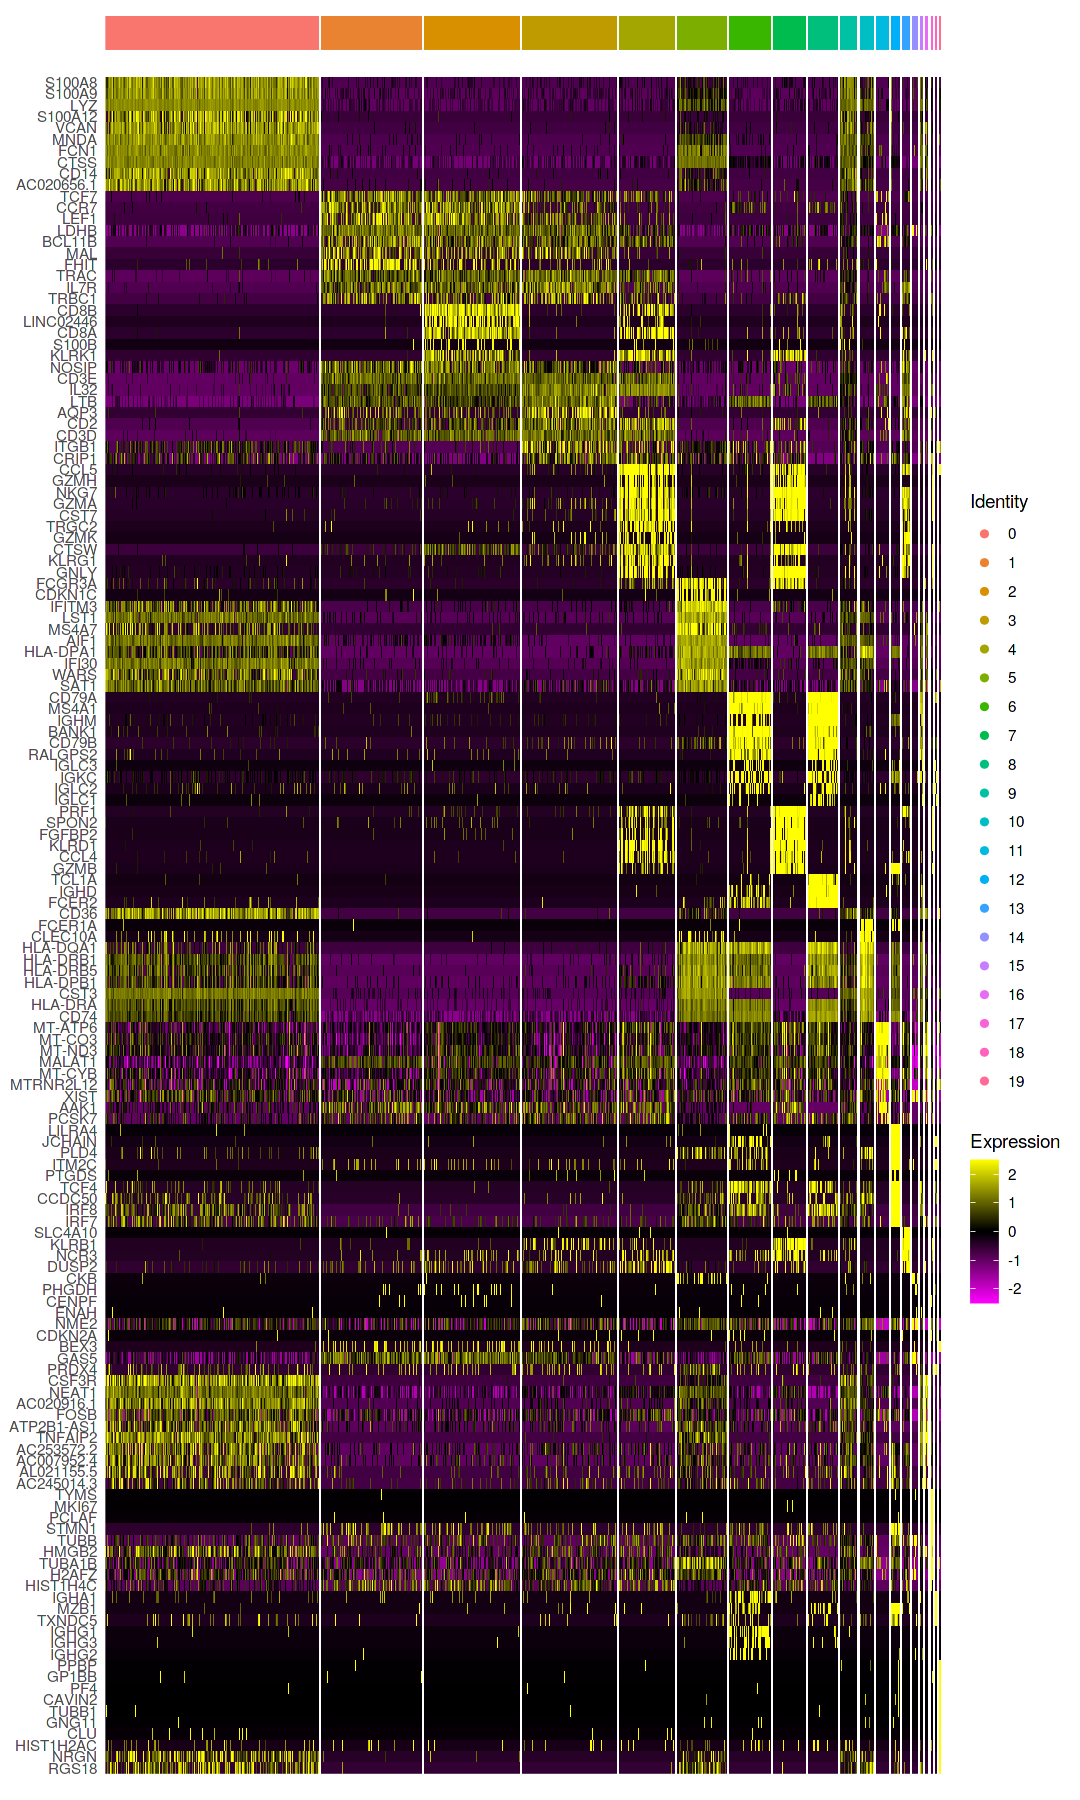

In [106]:
genelist = read.csv( paste0(outputRoot, "top10_diff_genes_wilcox.csv"), row.names = 1 )
#head(genelist)
#genelist <- pull(genelist, gene) %>% as.character
genelist <- unique( as.character( genelist$gene ) )
head(genelist)


#
p = DoHeatmap(scRNA0, features = genelist,
              label=F #防止报错，顶部不显示图例的文字
             # , group.by = "seurat_clusters" # 加不加一样
             )

options(repr.plot.width=9, repr.plot.height=15)
p

ggsave( paste0(outputRoot,'01_heatmap_eg.pdf'), p, width = 9, height = 15)

### downsample:每类抽n个细胞

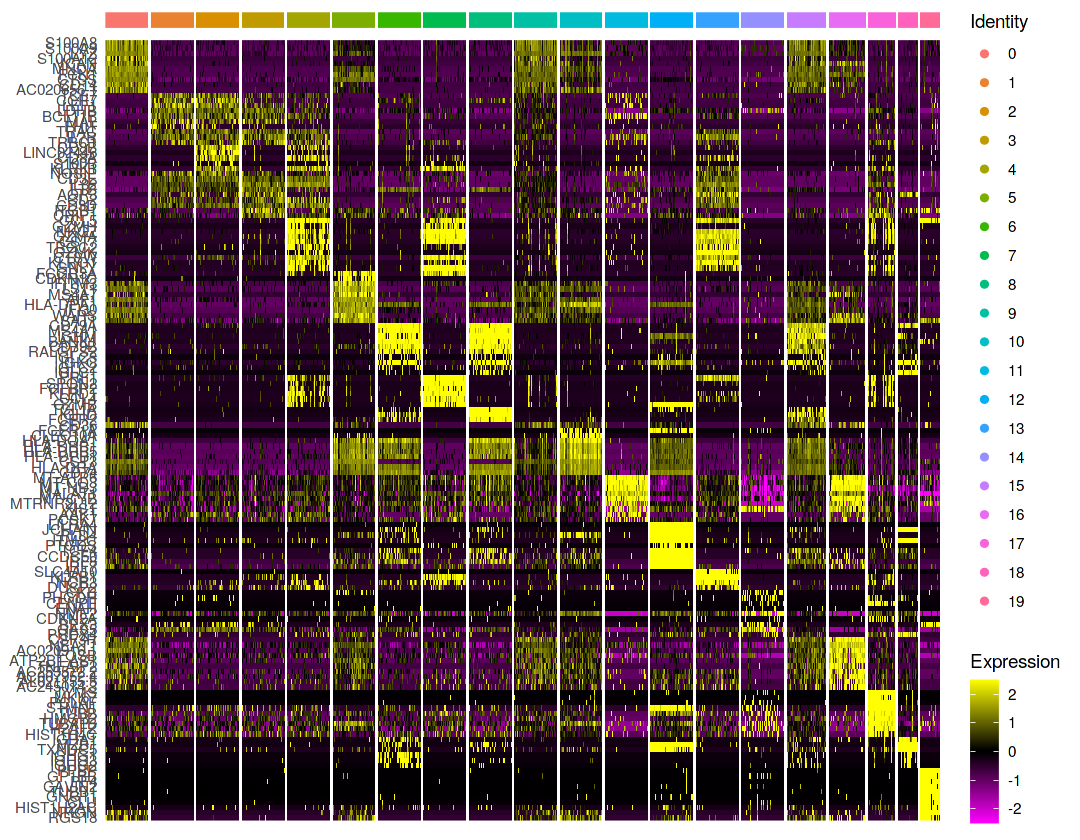

In [272]:
options(repr.plot.width=9, repr.plot.height=7)

#为了使少细胞cluster更明显
set.seed(20210215) #设置随机数，保证每次结果都一样。
DoHeatmap( subset(scRNA0, downsample=50 ), 
          features = genelist,
          label=F #防止报错，顶部不显示图例的文字
          # , group.by = "seurat_clusters" # 加不加一样
        )

## FeatureScatter散点图

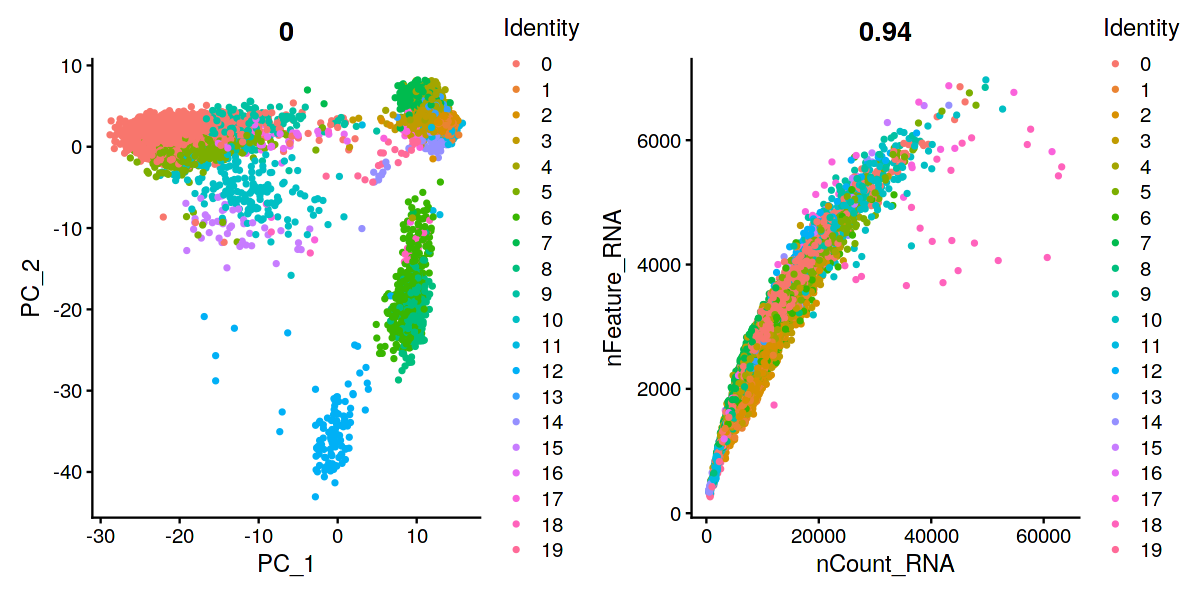

In [130]:
p1 <- FeatureScatter(scRNA0, feature1 = 'PC_1', feature2 = 'PC_2')
p2 <- FeatureScatter(scRNA0, feature1 = 'nCount_RNA', feature2 = 'nFeature_RNA')
plotc = p1|p2

options(repr.plot.width=10, repr.plot.height=5)
plotc

ggsave( paste0(outputRoot, '02_featurescatter_eg.pdf'), plotc, width = 10, height = 5)

### CD3+ 细胞按照CD4和CD8画图

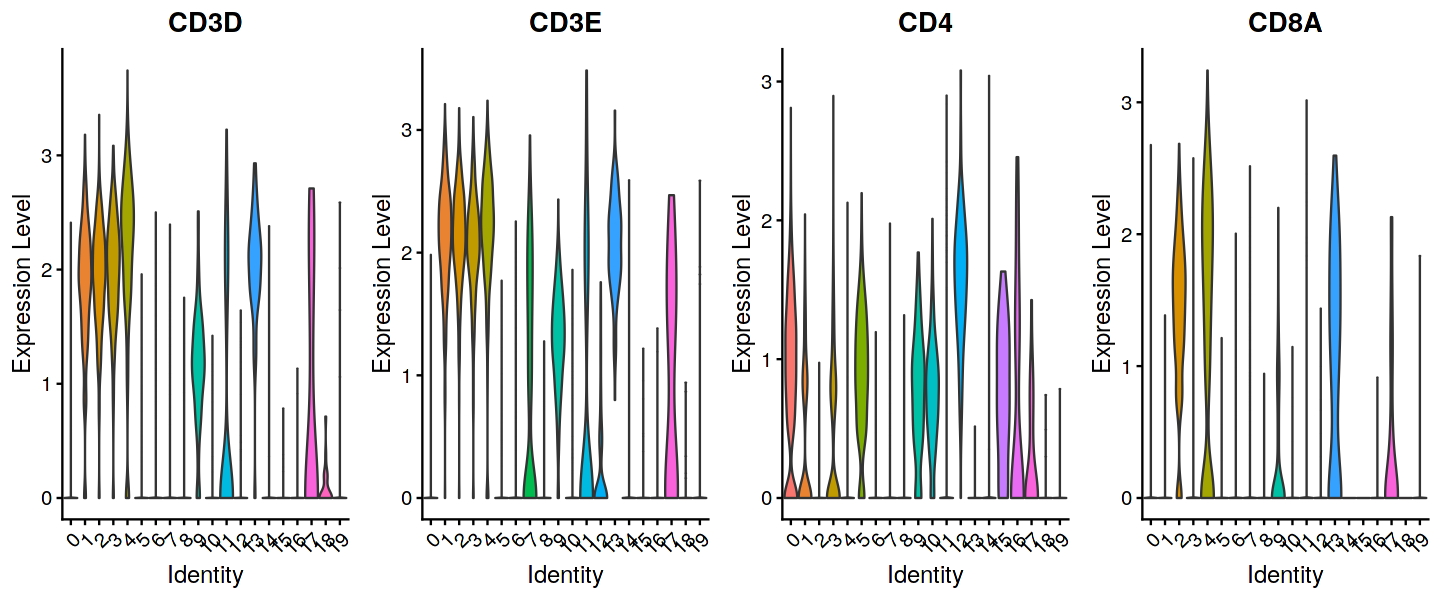

In [148]:
options(repr.plot.width=12, repr.plot.height=5)

VlnPlot(scRNA0, features =c("CD3D","CD3E", "CD4","CD8A"), ncol = 4, pt.size = 0 ) 

In [157]:
scSub=subset(scRNA0, subset = CD3D > 1)
scSub

table(scSub@meta.data$seurat_clusters)
# 取最多的几类

An object of class Seurat 
22860 features across 4799 samples within 1 assay 
Active assay: RNA (22860 features)
 3 dimensional reductions calculated: pca, umap, tsne


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
  27 1212 1212 1195  688   17   65   35    7  153    7   49    8  106    1    0 
  16   17   18   19 
   1   12    0    4 

In [160]:
scSub=subset(scRNA0, idents = c(1,2,3,4, 9, 13))
scSub

table(scSub@meta.data$seurat_clusters)

An object of class Seurat 
22860 features across 4901 samples within 1 assay 
Active assay: RNA (22860 features)
 3 dimensional reductions calculated: pca, umap, tsne


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
   0 1322 1252 1242  744    0    0    0    0  232    0    0    0  109    0    0 
  16   17   18   19 
   0    0    0    0 

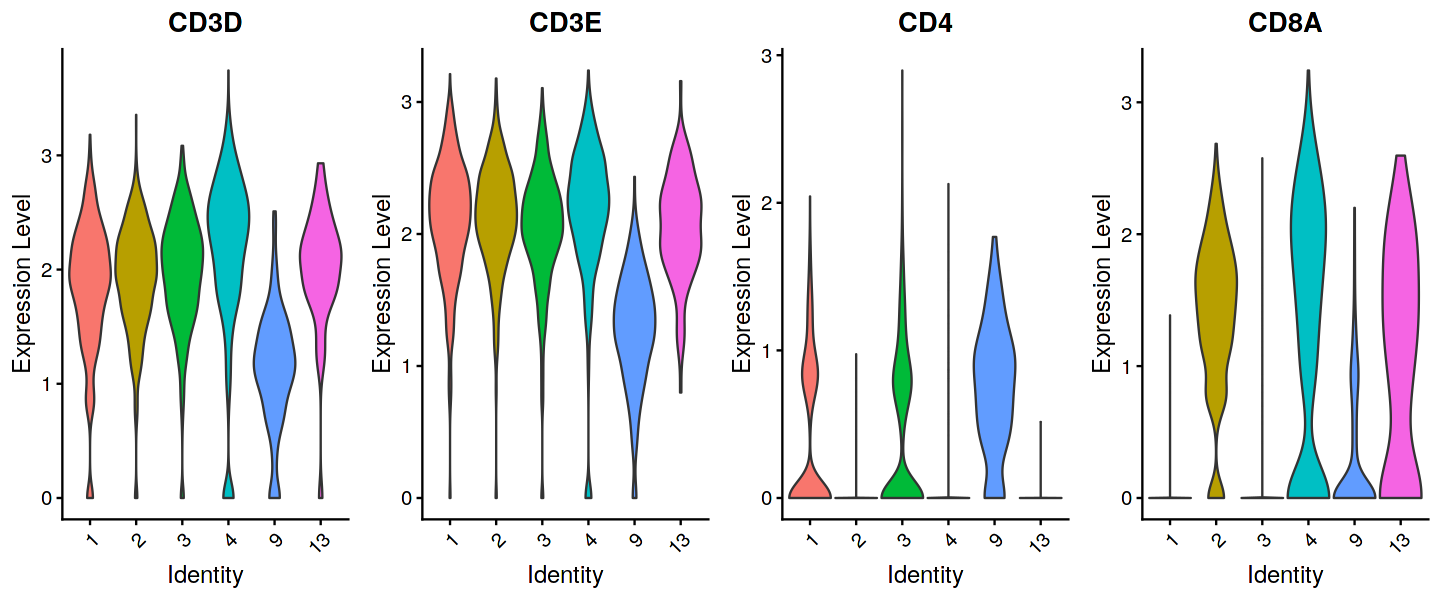

In [162]:
options(repr.plot.width=12, repr.plot.height=5)

VlnPlot(scSub, features =c("CD3D","CD3E", "CD4","CD8A"), ncol = 4, pt.size = 0 ) 

c9 都有一点点: CD4++ CD8+
- CD4: c1,3,9
- CD8: c2,4,13

### 可见：共表达效果很差。

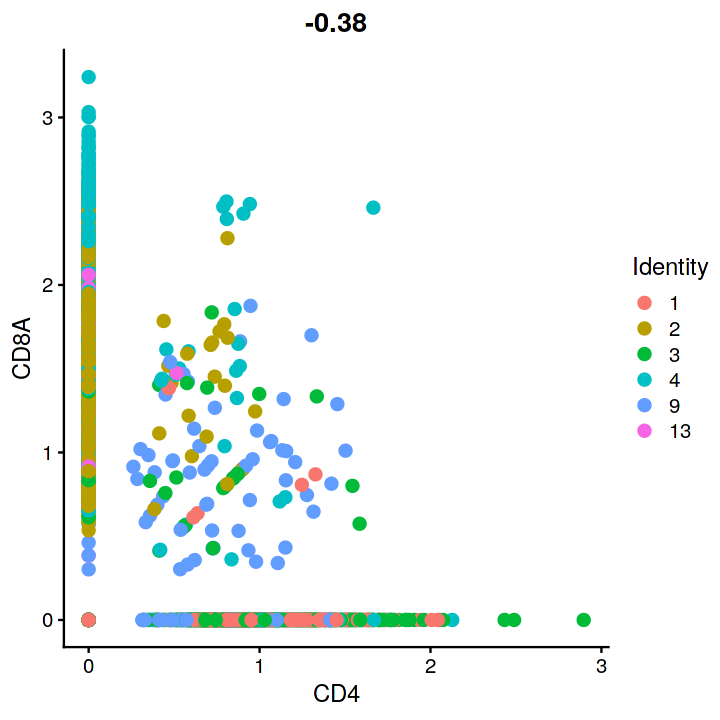

In [175]:
# 可见：共表达效果很差。

options(repr.plot.width=6, repr.plot.height=6)
FeatureScatter( scSub, #scale="log", 
               pt.size=3, #alpha=0.2,
               feature1 = 'CD4', feature2 = 'CD8A', 
               slot ="data")

## RidgePlot山脊图

Picking joint bandwidth of 0.0602

Picking joint bandwidth of 0.495

Picking joint bandwidth of 0.0602

Picking joint bandwidth of 0.495



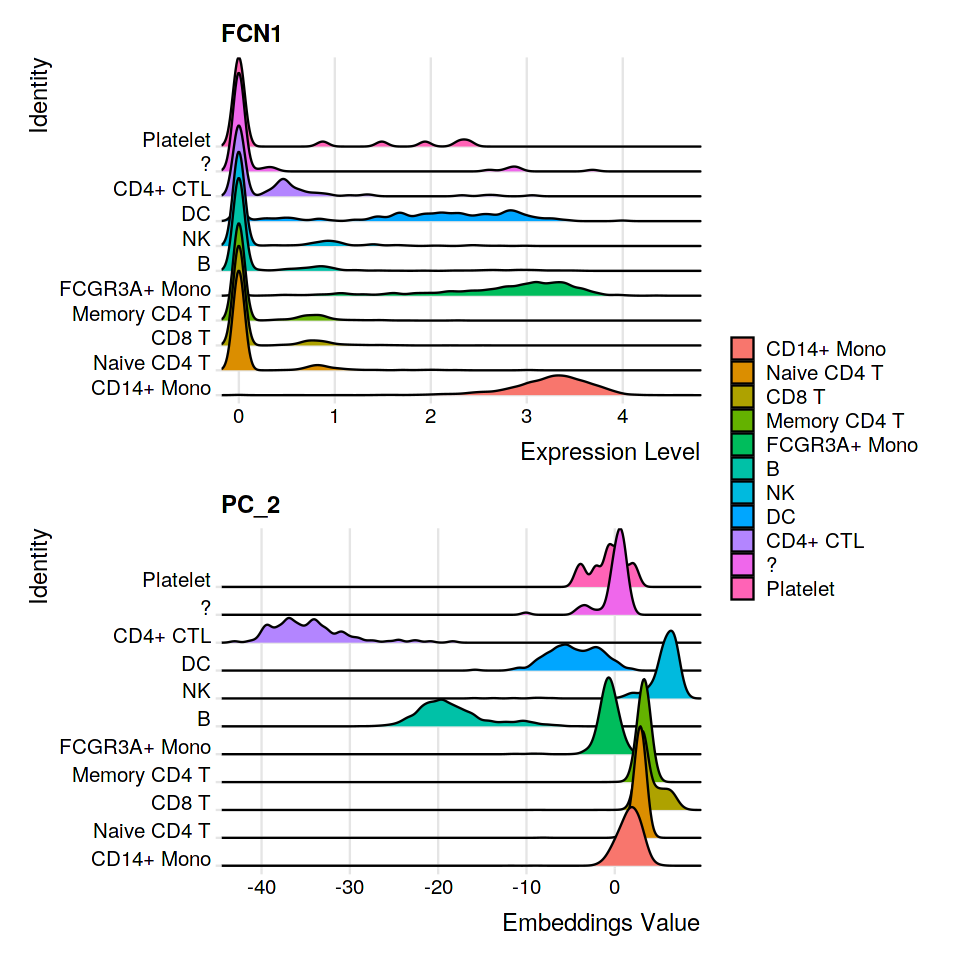

In [136]:
p1 = RidgePlot(scRNA, features = "FCN1")
p2 = RidgePlot(scRNA, features = "PC_2")
plotc = p1/p2 + plot_layout(guides = 'collect')

options(repr.plot.width=8, repr.plot.height=8)
plotc

ggsave( paste0(outputRoot,'02_ridgeplot_eg.pdf'), plotc, width = 8,height = 8)

Picking joint bandwidth of 0.0788



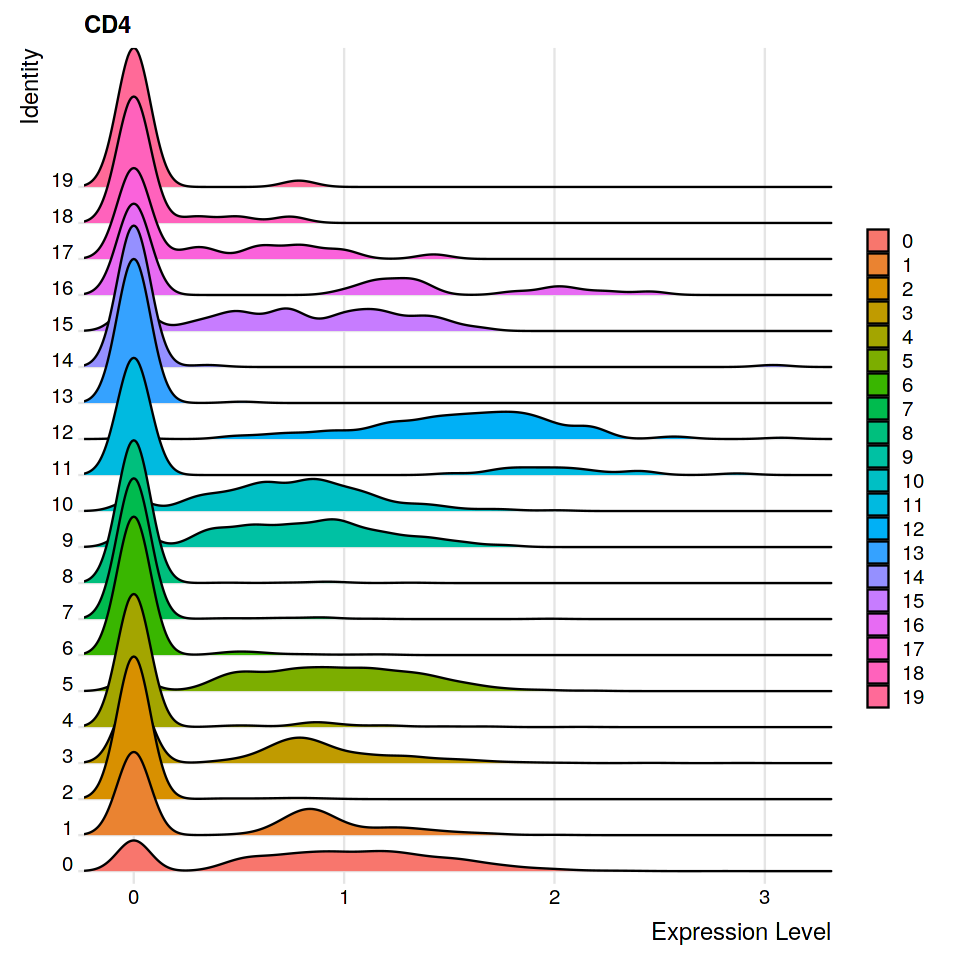

In [138]:
RidgePlot(scRNA0, features = "CD4")

# 自定义属性或可视化

## 添加meta.data

### 添加 ribo 比例

In [61]:
rb.genes <- rownames(scRNA)[grep("^RP[SL]",rownames(scRNA),ignore.case = T)]
length(rb.genes)
rb.genes

C<-GetAssayData(object = scRNA, slot = "counts")
percent.ribo <- Matrix::colSums(C[rb.genes,])/Matrix::colSums(C)*100
print(fivenum(percent.ribo))

scRNA <- AddMetaData(scRNA, percent.ribo, col.name = "percent.ribo")
head(scRNA@meta.data, n=3)

[1] 98

[1] "RPL22"       "RPL11"       "RPS6KA1"     "RPS8"        "RPL5"       
 [6] "RPS27"       "RPS6KC1"     "RPS7"        "RPS27A"      "RPL31"      
[11] "RPL37A"      "RPL32"       "RPL15"       "RPSA"        "RPL14"      
[16] "RPL29"       "RPL24"       "RPL22L1"     "RPL39L"      "RPL35A"     
[21] "RPL9"        "RPL34-AS1"   "RPL34"       "RPS3A"       "RPL37"      
[26] "RPS23"       "RPS14"       "RPL26L1"     "RPS18"       "RPS10-NUDT3"
[31] "RPS10"       "RPL10A"      "RPL7L1"      "RPS12"       "RPS6KA2"    
[36] "RPS6KA2-IT1" "RPS20"       "RPL7"        "RPL30"       "RPL8"       
[41] "RPS6"        "RPL35"       "RPL12"       "RPL7A"       "RPS24"      
[46] "RPLP2"       "RPL27A"      "RPS13"       "RPS6KA4"     "RPS6KB2"    
[51] "RPS6KB2-AS1" "RPS3"        "RPS25"       "RPS26"       "RPL41"      
[56] "RPL6"        "RPLP0"       "RPL21"       "RPS29"       "RPL36AL"    
[61] "RPS6KL1"     "RPS6KA5"     "RPS27L"      "RPL4"        "RPLP1"      
[66] "RPS17"       "RPS2"        "RPS15A"      "RPL13"       "RPL26"      
[71] "RPL23A"      "RPL23"       "RPL19"       "RPL27"       "RPS6KB1"    
[76] "RPL38"       "RPL17"       "RPS15"       "RPL36"       "RPS28"      
[81] "RPL18A"      "RPS16"       "RPS19"       "RPL18"       "RPL13A"     
[86] "RPS11"       "RPS9"        "RPL28"       "RPS5"        "RPS21"      
[91] "RPL3"        "RPS19BP1"    "RPS6KA3"     "RPS4X"       "RPS6KA6"    
[96] "RPL36A"      "RPL39"       "RPL10"

CTATCTAGTGGACAGT TCATTCATCGTTGTGA TCCCACAGTGAGATAT TCGGTCTCAATTGAGA 
        1.267351        16.646591        26.300366        39.548371 
GGAGGATCAAGGCGTA 
       55.755396 


orig.ident nCount_RNA nFeature_RNA percent.mt RNA_snn_res.0.5
AAACCCAGTATCGTAC pbmc10k     1628       749          0.4299754 0              
AAACCCAGTCGGTGAA pbmc10k     6590      1867         10.3034901 13             
AAACCCAGTTAGAAAC pbmc10k    17318      3809          5.4913962 0              
                 seurat_clusters cellType   percent.ribo
AAACCCAGTATCGTAC 0               CD14+ Mono 26.41278    
AAACCCAGTCGGTGAA 13              CD8 T      34.87102    
AAACCCAGTTAGAAAC 0               CD14+ Mono 16.87262

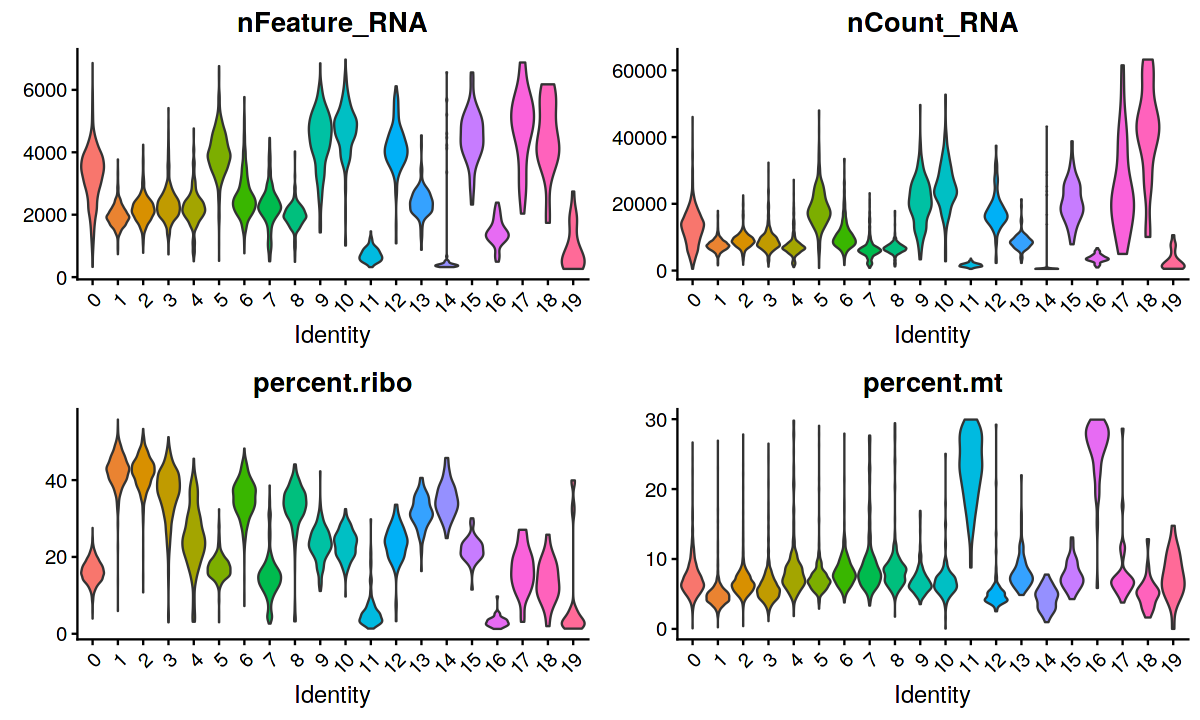

In [62]:
options(repr.plot.width=10, repr.plot.height=6)

VlnPlot(scRNA, features = c("nFeature_RNA", "nCount_RNA", "percent.ribo", "percent.mt"), ncol = 2, pt.size=0)

- feature and counts 少: c(11,16,19)
- mt太高: c(11,16,19)
- ribo 低说明蛋白合成慢: c(11,16,19,  0)

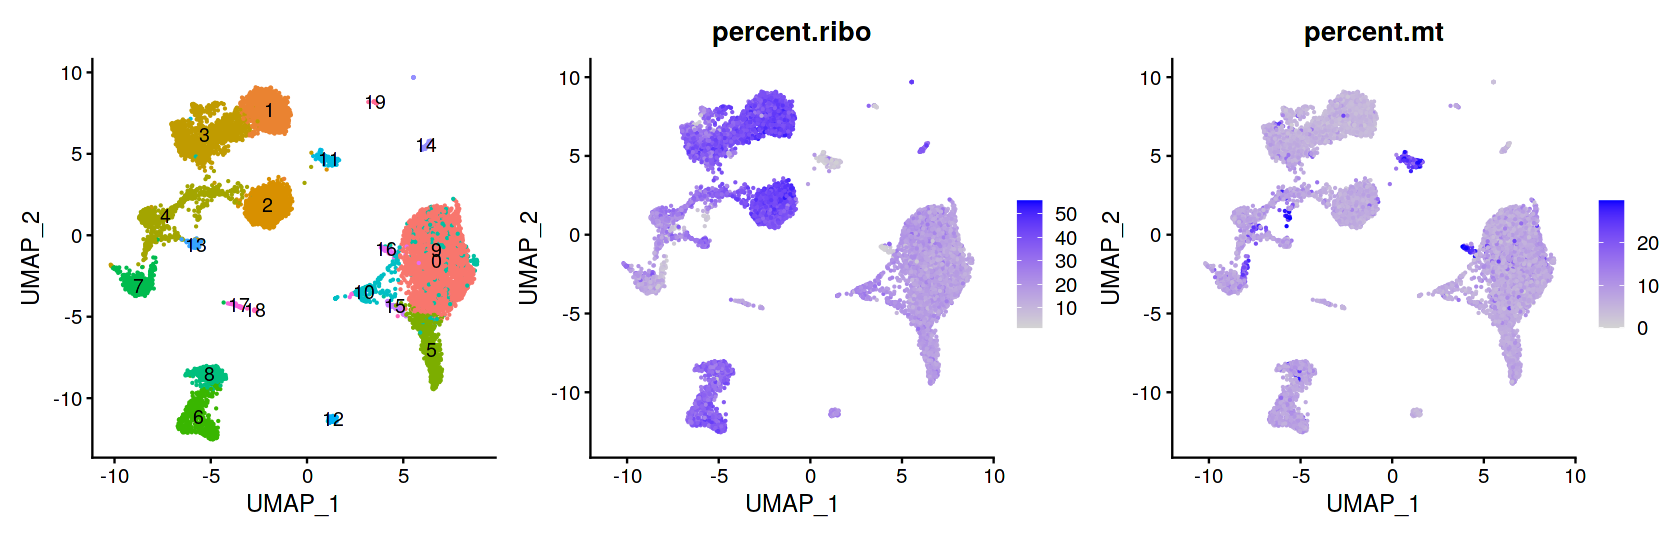

In [68]:
p1=DimPlot(scRNA, label = T)+NoLegend()
p2=FeaturePlot(scRNA, features = c("percent.ribo"))
p3=FeaturePlot(scRNA, features = c("percent.mt"))

options(repr.plot.width=14, repr.plot.height=4.5)
p1|p2|p3

### 添加 HB 血红蛋白比例

In [69]:
HB.genes <- c("HBA1","HBA2","HBB","HBD","HBE1","HBG1","HBG2","HBM","HBQ1","HBZ")
HB_m <- match(HB.genes, rownames(scRNA@assays$RNA)) 
#
HB.genes <- rownames(scRNA@assays$RNA)[HB_m]
HB.genes <- HB.genes[!is.na(HB.genes)]
#
scRNA[["percent.HB"]]<-PercentageFeatureSet(scRNA, features=HB.genes) 
head(scRNA@meta.data)

orig.ident nCount_RNA nFeature_RNA percent.mt RNA_snn_res.0.5
AAACCCAGTATCGTAC pbmc10k     1628       749          0.4299754 0              
AAACCCAGTCGGTGAA pbmc10k     6590      1867         10.3034901 13             
AAACCCAGTTAGAAAC pbmc10k    17318      3809          5.4913962 0              
AAACCCAGTTATCTTC pbmc10k     3526      1516         13.4997164 7              
AAACCCAGTTGCCGAC pbmc10k     6228      2110          6.0533076 0              
AAACCCAGTTTCCCAC pbmc10k    22044      4598          6.5278534 9              
                 seurat_clusters cellType   percent.ribo percent.HB
AAACCCAGTATCGTAC 0               CD14+ Mono 26.41278     0         
AAACCCAGTCGGTGAA 13              CD8 T      34.87102     0         
AAACCCAGTTAGAAAC 0               CD14+ Mono 16.87262     0         
AAACCCAGTTATCTTC 7               NK          3.40329     0         
AAACCCAGTTGCCGAC 0               CD14+ Mono 11.68915     0         
AAACCCAGTTTCCCAC 9               CD14+ Mono 24.51007     0

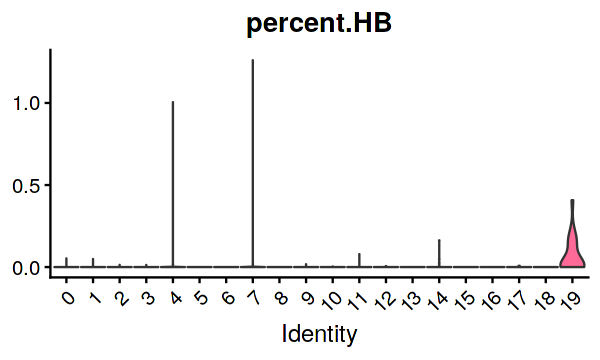

In [70]:
options(repr.plot.width=5, repr.plot.height=3)
VlnPlot(scRNA, features = c("percent.HB"), ncol = 1, pt.size=0)+NoLegend()
# 

- HB 高的: c(19)

### 添加cycle细胞周期蛋白打分 

In [43]:
# seurat 内置cycle基因list
cc.genes

$s.genes
 [1] "MCM5"     "PCNA"     "TYMS"     "FEN1"     "MCM2"     "MCM4"    
 [7] "RRM1"     "UNG"      "GINS2"    "MCM6"     "CDCA7"    "DTL"     
[13] "PRIM1"    "UHRF1"    "MLF1IP"   "HELLS"    "RFC2"     "RPA2"    
[19] "NASP"     "RAD51AP1" "GMNN"     "WDR76"    "SLBP"     "CCNE2"   
[25] "UBR7"     "POLD3"    "MSH2"     "ATAD2"    "RAD51"    "RRM2"    
[31] "CDC45"    "CDC6"     "EXO1"     "TIPIN"    "DSCC1"    "BLM"     
[37] "CASP8AP2" "USP1"     "CLSPN"    "POLA1"    "CHAF1B"   "BRIP1"   
[43] "E2F8"    

$g2m.genes
 [1] "HMGB2"   "CDK1"    "NUSAP1"  "UBE2C"   "BIRC5"   "TPX2"    "TOP2A"  
 [8] "NDC80"   "CKS2"    "NUF2"    "CKS1B"   "MKI67"   "TMPO"    "CENPF"  
[15] "TACC3"   "FAM64A"  "SMC4"    "CCNB2"   "CKAP2L"  "CKAP2"   "AURKB"  
[22] "BUB1"    "KIF11"   "ANP32E"  "TUBB4B"  "GTSE1"   "KIF20B"  "HJURP"  
[29] "CDCA3"   "HN1"     "CDC20"   "TTK"     "CDC25C"  "KIF2C"   "RANGAP1"
[36] "NCAPD2"  "DLGAP5"  "CDCA2"   "CDCA8"   "ECT2"    "KIF23"   "HMMR"   
[43] "AURKA"   "PSRC1"   "ANLN"    "LBR"     "CKAP5"   "CENPE"   "CTCF"   
[50] "NEK2"    "G2E3"    "GAS2L3"  "CBX5"    "CENPA"

In [71]:
# 共有基因
cc.genes[["s2"]] <- intersect(cc.genes$s.genes, rownames(scRNA@assays$RNA))
cc.genes[["g2m2"]] <- intersect(cc.genes$g2m.genes, rownames(scRNA@assays$RNA))

In [50]:
cc.genes

$s.genes
 [1] "MCM5"     "PCNA"     "TYMS"     "FEN1"     "MCM2"     "MCM4"    
 [7] "RRM1"     "UNG"      "GINS2"    "MCM6"     "CDCA7"    "DTL"     
[13] "PRIM1"    "UHRF1"    "MLF1IP"   "HELLS"    "RFC2"     "RPA2"    
[19] "NASP"     "RAD51AP1" "GMNN"     "WDR76"    "SLBP"     "CCNE2"   
[25] "UBR7"     "POLD3"    "MSH2"     "ATAD2"    "RAD51"    "RRM2"    
[31] "CDC45"    "CDC6"     "EXO1"     "TIPIN"    "DSCC1"    "BLM"     
[37] "CASP8AP2" "USP1"     "CLSPN"    "POLA1"    "CHAF1B"   "BRIP1"   
[43] "E2F8"    

$g2m.genes
 [1] "HMGB2"   "CDK1"    "NUSAP1"  "UBE2C"   "BIRC5"   "TPX2"    "TOP2A"  
 [8] "NDC80"   "CKS2"    "NUF2"    "CKS1B"   "MKI67"   "TMPO"    "CENPF"  
[15] "TACC3"   "FAM64A"  "SMC4"    "CCNB2"   "CKAP2L"  "CKAP2"   "AURKB"  
[22] "BUB1"    "KIF11"   "ANP32E"  "TUBB4B"  "GTSE1"   "KIF20B"  "HJURP"  
[29] "CDCA3"   "HN1"     "CDC20"   "TTK"     "CDC25C"  "KIF2C"   "RANGAP1"
[36] "NCAPD2"  "DLGAP5"  "CDCA2"   "CDCA8"   "ECT2"    "KIF23"   "HMMR"   
[43] "AURKA"   "PSRC1"   "ANLN"    "LBR"     "CKAP5"   "CENPE"   "CTCF"   
[50] "NEK2"    "G2E3"    "GAS2L3"  "CBX5"    "CENPA"  

$s2
 [1] "MCM5"     "PCNA"     "TYMS"     "FEN1"     "MCM2"     "MCM4"    
 [7] "RRM1"     "UNG"      "GINS2"    "MCM6"     "CDCA7"    "DTL"     
[13] "PRIM1"    "UHRF1"    "HELLS"    "RFC2"     "RPA2"     "NASP"    
[19] "RAD51AP1" "GMNN"     "WDR76"    "SLBP"     "CCNE2"    "UBR7"    
[25] "POLD3"    "MSH2"     "ATAD2"    "RAD51"    "RRM2"     "CDC45"   
[31] "CDC6"     "EXO1"     "TIPIN"    "DSCC1"    "BLM"      "CASP8AP2"
[37] "USP1"     "CLSPN"    "POLA1"    "CHAF1B"   "BRIP1"    "E2F8"    

$g2m2
 [1] "HMGB2"   "CDK1"    "NUSAP1"  "UBE2C"   "BIRC5"   "TPX2"    "TOP2A"  
 [8] "NDC80"   "CKS2"    "NUF2"    "CKS1B"   "MKI67"   "TMPO"    "CENPF"  
[15] "TACC3"   "SMC4"    "CCNB2"   "CKAP2L"  "CKAP2"   "AURKB"   "BUB1"   
[22] "KIF11"   "ANP32E"  "TUBB4B"  "GTSE1"   "KIF20B"  "HJURP"   "CDCA3"  
[29] "CDC20"   "TTK"     "CDC25C"  "KIF2C"   "RANGAP1" "NCAPD2"  "DLGAP5" 
[36] "CDCA2"   "CDCA8"   "ECT2"    "KIF23"   "HMMR"    "AURKA"   "PSRC1"  
[43] "ANLN"    "LBR"     "CKAP5"   "CENPE"   "CTCF"    "NEK2"    "G2E3"   
[50] "GAS2L3"  "CBX5"    "CENPA"

In [52]:
cc.genes[['s2']]

[1] "MCM5"     "PCNA"     "TYMS"     "FEN1"     "MCM2"     "MCM4"    
 [7] "RRM1"     "UNG"      "GINS2"    "MCM6"     "CDCA7"    "DTL"     
[13] "PRIM1"    "UHRF1"    "HELLS"    "RFC2"     "RPA2"     "NASP"    
[19] "RAD51AP1" "GMNN"     "WDR76"    "SLBP"     "CCNE2"    "UBR7"    
[25] "POLD3"    "MSH2"     "ATAD2"    "RAD51"    "RRM2"     "CDC45"   
[31] "CDC6"     "EXO1"     "TIPIN"    "DSCC1"    "BLM"      "CASP8AP2"
[37] "USP1"     "CLSPN"    "POLA1"    "CHAF1B"   "BRIP1"    "E2F8"

In [54]:
head(PercentageFeatureSet(scRNA, features=cc.genes[['s2']]))

nCount_RNA
AAACCCAGTATCGTAC 0.00000000
AAACCCAGTCGGTGAA 0.04552352
AAACCCAGTTAGAAAC 0.02309736
AAACCCAGTTATCTTC 0.00000000
AAACCCAGTTGCCGAC 0.01605652
AAACCCAGTTTCCCAC 0.04536382

In [73]:
scRNA[["cycle_s"]]<-PercentageFeatureSet(scRNA, features=cc.genes[['s2']])
scRNA[["cycle_g2m"]]<-PercentageFeatureSet(scRNA, features=cc.genes[['g2m2']])
head(scRNA@meta.data)

orig.ident nCount_RNA nFeature_RNA percent.mt RNA_snn_res.0.5
AAACCCAGTATCGTAC pbmc10k     1628       749          0.4299754 0              
AAACCCAGTCGGTGAA pbmc10k     6590      1867         10.3034901 13             
AAACCCAGTTAGAAAC pbmc10k    17318      3809          5.4913962 0              
AAACCCAGTTATCTTC pbmc10k     3526      1516         13.4997164 7              
AAACCCAGTTGCCGAC pbmc10k     6228      2110          6.0533076 0              
AAACCCAGTTTCCCAC pbmc10k    22044      4598          6.5278534 9              
                 seurat_clusters cellType   percent.ribo percent.HB cycle_s2  
AAACCCAGTATCGTAC 0               CD14+ Mono 26.41278     0          0.00000000
AAACCCAGTCGGTGAA 13              CD8 T      34.87102     0          0.04552352
AAACCCAGTTAGAAAC 0               CD14+ Mono 16.87262     0          0.02309736
AAACCCAGTTATCTTC 7               NK          3.40329     0          0.00000000
AAACCCAGTTGCCGAC 0               CD14+ Mono 11.68915     0          0.01605652
AAACCCAGTTTCCCAC 9               CD14+ Mono 24.51007     0          0.04536382
                 cycle_g2m  cycle_s   
AAACCCAGTATCGTAC 0.00000000 0.00000000
AAACCCAGTCGGTGAA 0.06069803 0.04552352
AAACCCAGTTAGAAAC 0.09238942 0.02309736
AAACCCAGTTATCTTC 0.08508225 0.00000000
AAACCCAGTTGCCGAC 0.12845215 0.01605652
AAACCCAGTTTCCCAC 0.05897296 0.04536382

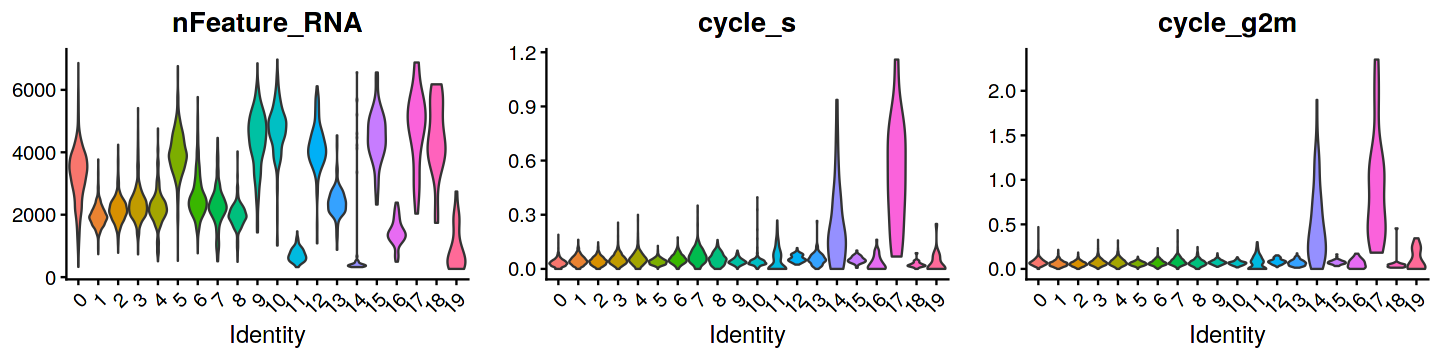

In [80]:
options(repr.plot.width=12, repr.plot.height=3)

VlnPlot(scRNA, features = c("nFeature_RNA", "cycle_s", "cycle_g2m"), ncol = 3, pt.size=0)
# cycle 活跃: c(14,17), c14是碎片

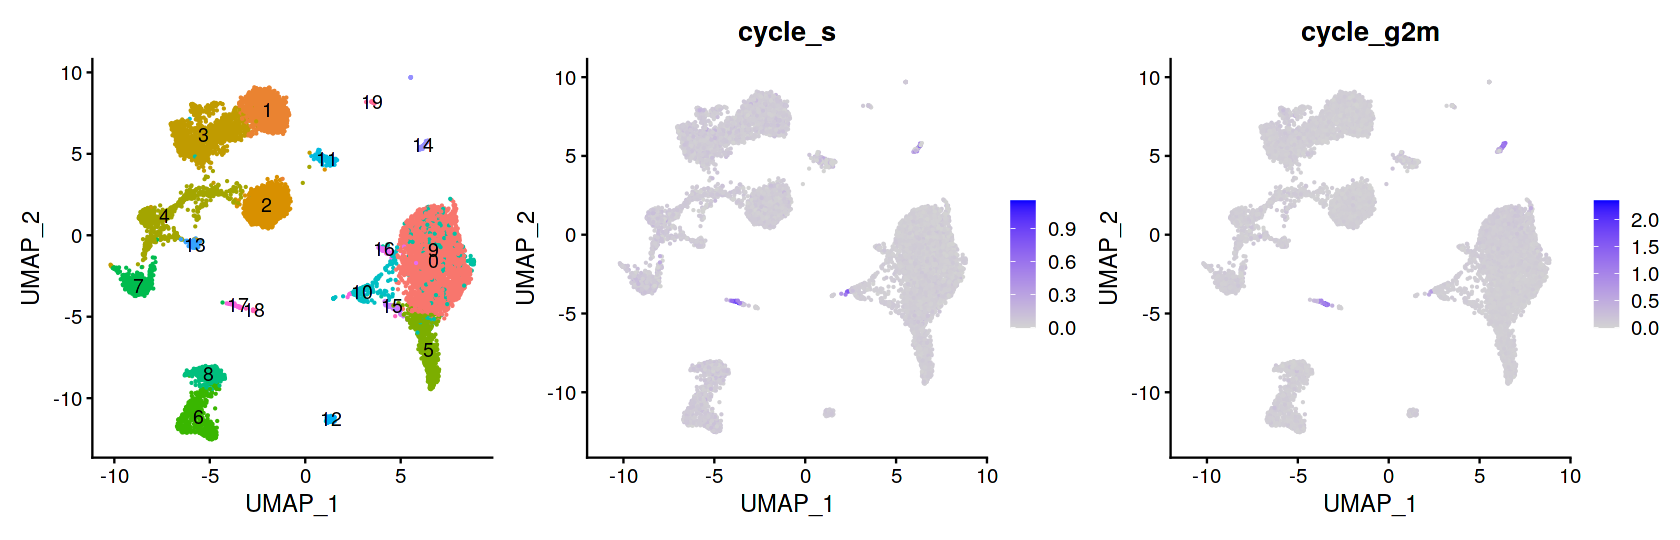

In [74]:
p1=DimPlot(scRNA, label = T)+NoLegend()
p2=FeaturePlot(scRNA, features = c("cycle_s"))
p3=FeaturePlot(scRNA, features = c("cycle_g2m"))

options(repr.plot.width=14, repr.plot.height=4.5)
p1|p2|p3

## ggplot2画tSNE图，添加圆圈 

In [86]:
# 获取 tSNE 坐标: 数据位置
head(scRNA@reductions$tsne@cell.embeddings, n=3)

tSNE_1     tSNE_2    
AAACCCAGTATCGTAC -14.458169  -7.568576
AAACCCAGTCGGTGAA   5.161539  27.428335
AAACCCAGTTAGAAAC  -1.834968 -27.030649

In [81]:
# 获取 tSNE 坐标: 使用函数 Embeddings()
tsne_em=as.data.frame( Embeddings(scRNA, "tsne") )
head(tsne_em, n=2)

dat=data.frame( 
    tSNE_1=tsne_em$tSNE_1,
    tSNE_2=tsne_em$tSNE_2,
    cluster=scRNA@meta.data$seurat_clusters
)
head(dat, n=2)

tSNE_1     tSNE_2   
AAACCCAGTATCGTAC -14.458169 -7.568576
AAACCCAGTCGGTGAA   5.161539 27.428335

tSNE_1     tSNE_2    cluster
1 -14.458169 -7.568576 0      
2   5.161539 27.428335 13

Warning message in MASS::cov.trob(data[, vars]):
“Probable convergence failure”
Warning message in MASS::cov.trob(data[, vars]):
“Probable convergence failure”
Warning message in MASS::cov.trob(data[, vars]):
“Probable convergence failure”
Warning message in MASS::cov.trob(data[, vars]):
“Probable convergence failure”


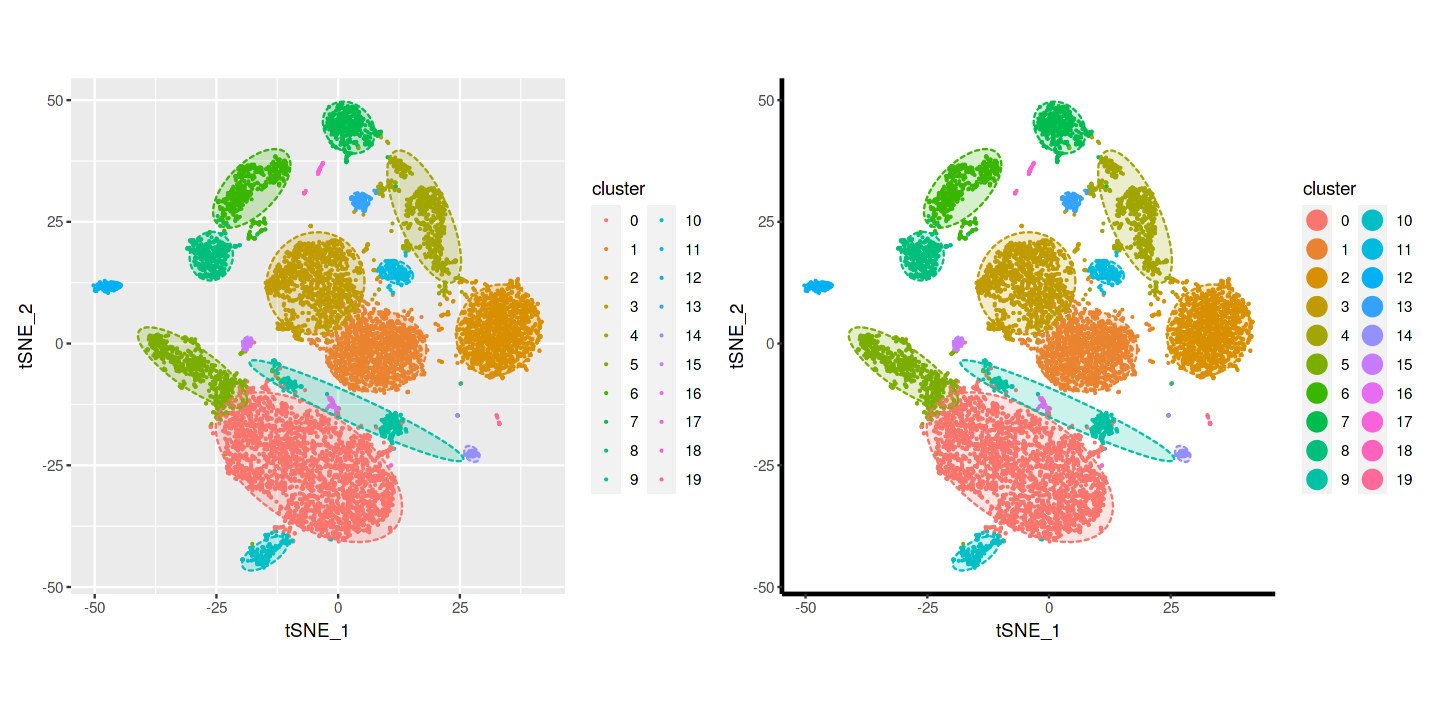

In [102]:
# DimPlot(scRNA,reduction = "tsne",label=T, split.by ='seurat_clusters')

# pic1
p=ggplot(dat,aes(x=tSNE_1,y=tSNE_2,color=cluster))+geom_point(size=0.1)+
    guides(color=guide_legend(ncol=2)) #图例两列

p=p+stat_ellipse(data=dat,aes(x=tSNE_1,y=tSNE_2,fill=cluster,color=cluster), #添加椭圆
 geom = "polygon",alpha=0.2,level=0.9,type="t",linetype = 2,show.legend = F)+coord_fixed()

# pic2
theme= theme(panel.grid =element_blank()) + ## 删去网格
 theme(panel.border = element_blank(),panel.background = element_blank()) + ## 删去外层边框
 theme(axis.line = element_line(size=1, colour = "black")) 
p2=p+theme+
 guides( color = guide_legend(ncol=2, override.aes = list(size=5))) #两列，放大图例

options(repr.plot.width=12, repr.plot.height=6)
print(p | p2)

## 按照PC_1展开

In [106]:
head(scRNA@meta.data)

orig.ident nCount_RNA nFeature_RNA percent.mt RNA_snn_res.0.5
AAACCCAGTATCGTAC pbmc10k     1628       749          0.4299754 0              
AAACCCAGTCGGTGAA pbmc10k     6590      1867         10.3034901 13             
AAACCCAGTTAGAAAC pbmc10k    17318      3809          5.4913962 0              
AAACCCAGTTATCTTC pbmc10k     3526      1516         13.4997164 7              
AAACCCAGTTGCCGAC pbmc10k     6228      2110          6.0533076 0              
AAACCCAGTTTCCCAC pbmc10k    22044      4598          6.5278534 9              
                 seurat_clusters cellType   percent.ribo percent.HB cycle_s2  
AAACCCAGTATCGTAC 0               CD14+ Mono 26.41278     0          0.00000000
AAACCCAGTCGGTGAA 13              CD8 T      34.87102     0          0.04552352
AAACCCAGTTAGAAAC 0               CD14+ Mono 16.87262     0          0.02309736
AAACCCAGTTATCTTC 7               NK          3.40329     0          0.00000000
AAACCCAGTTGCCGAC 0               CD14+ Mono 11.68915     0          0.01605652
AAACCCAGTTTCCCAC 9               CD14+ Mono 24.51007     0          0.04536382
                 cycle_g2m  cycle_s   
AAACCCAGTATCGTAC 0.00000000 0.00000000
AAACCCAGTCGGTGAA 0.06069803 0.04552352
AAACCCAGTTAGAAAC 0.09238942 0.02309736
AAACCCAGTTATCTTC 0.08508225 0.00000000
AAACCCAGTTGCCGAC 0.12845215 0.01605652
AAACCCAGTTTCCCAC 0.05897296 0.04536382

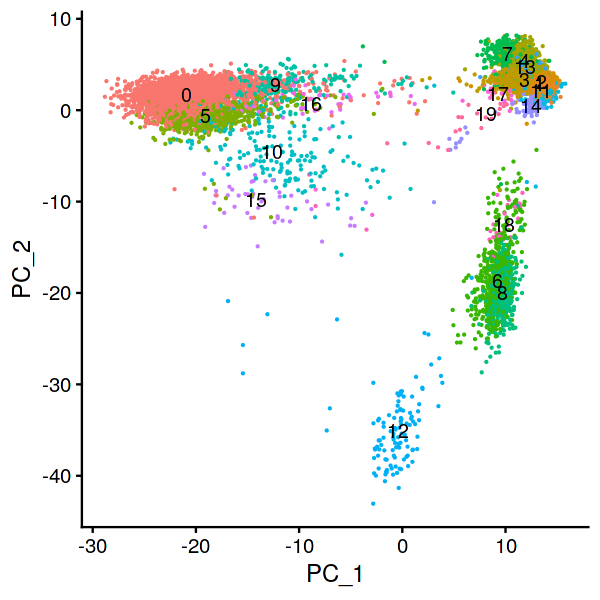

In [107]:
options(repr.plot.width=5, repr.plot.height=5)

DimPlot(scRNA, reduction = "pca", label = T)+NoLegend()

In [113]:
pca.em=as.data.frame( Embeddings(scRNA, 'pca') )
head(pca.em[,1:5])

PC_1       PC_2     PC_3       PC_4       PC_5       
AAACCCAGTATCGTAC  -6.657777 1.624132   2.376272  1.7028841 -6.05649330
AAACCCAGTCGGTGAA  13.097682 4.800738  -1.535747  1.4142074  0.57204529
AAACCCAGTTAGAAAC -23.527514 1.035331   1.250562 -1.0044033  4.73075650
AAACCCAGTTATCTTC  11.310227 6.385466 -15.967999 13.0666315  6.01642804
AAACCCAGTTGCCGAC -19.264760 1.939729   1.712579 -0.7320984  2.35905505
AAACCCAGTTTCCCAC -13.520543 1.861992   2.077127 -1.4246722  0.01728096

In [114]:
scRNA <- AddMetaData(scRNA, pca.em$PC_1, col.name = "PC_1")
scRNA <- AddMetaData(scRNA, pca.em$PC_2, col.name = "PC_2")
head(scRNA@meta.data, n=2)

orig.ident nCount_RNA nFeature_RNA percent.mt RNA_snn_res.0.5
AAACCCAGTATCGTAC pbmc10k    1628        749          0.4299754 0              
AAACCCAGTCGGTGAA pbmc10k    6590       1867         10.3034901 13             
                 seurat_clusters cellType   percent.ribo percent.HB cycle_s2  
AAACCCAGTATCGTAC 0               CD14+ Mono 26.41278     0          0.00000000
AAACCCAGTCGGTGAA 13              CD8 T      34.87102     0          0.04552352
                 cycle_g2m  cycle_s    PC_1      PC_2    
AAACCCAGTATCGTAC 0.00000000 0.00000000 -6.657777 1.624132
AAACCCAGTCGGTGAA 0.06069803 0.04552352 13.097682 4.800738

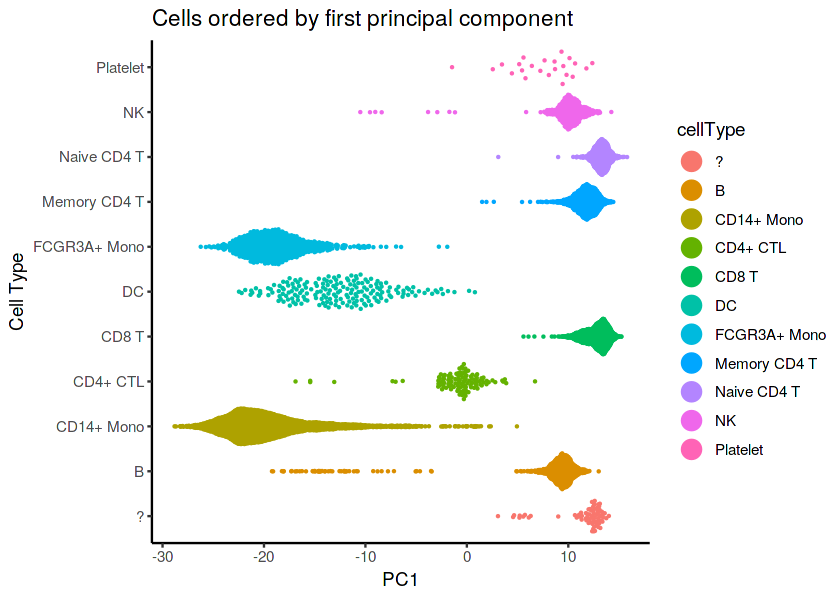

In [171]:
# PCA is a simple approach and can be good to compare to more complex algorithms designed 
# to capture differentiation processes. As a simple measure of pseudotime we can use the coordinates of PC1.
# Plot PC1 vs cell_type2. 
library( ggbeeswarm)
library( ggthemes )

df=as.data.frame( scRNA@meta.data )

p1=ggplot( df, aes(x = PC_1, y = cellType, colour = cellType )) +
    geom_quasirandom(groupOnX = FALSE, size=0.2) + #ggbeeswarm包
    #scale_color_tableau() +  #ggthemes包  默认只有10种颜色，不够用
    theme_classic() + xlab("PC1") + ylab("Cell Type") +
    ggtitle("Cells ordered by first principal component")+
    guides( color = guide_legend( override.aes = list(size=5))) #放大图例

options(repr.plot.width=7, repr.plot.height=5)
p1

### 对y轴细胞名排序: 按照x坐标

  CD14+ Mono FCGR3A+ Mono           DC     CD4+ CTL     Platelet            B 
 -19.6278182  -18.7474527  -12.5230702   -0.9600688    7.4431193    8.3107467 
          NK            ? Memory CD4 T        CD8 T  Naive CD4 T 
   9.9792115   11.5420359   11.6934830   12.7836541   13.2680536 


[1] "CD14+ Mono"   "FCGR3A+ Mono" "DC"           "CD4+ CTL"     "Platelet"    
 [6] "B"            "NK"           "?"            "Memory CD4 T" "CD8 T"       
[11] "Naive CD4 T"

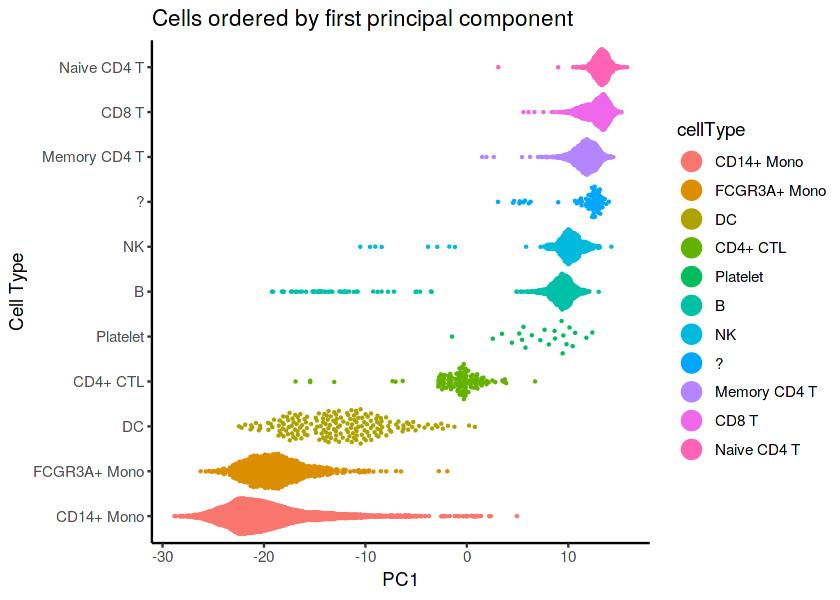

In [171]:
# reorder
orders=sapply(split(df$PC_1, df$cellType), mean)
orders=orders[order(orders)]
print(orders)
names(orders)

df2=df
df2$cellType=factor( as.character(df2$cellType), levels = names(orders) )
#str(df2)

p1=ggplot( df2, aes(x = PC_1, y = cellType, colour = cellType )) +
    geom_quasirandom(groupOnX = FALSE, size=0.2) + #ggbeeswarm包
    #scale_color_tableau() +  #ggthemes包
    theme_classic() + xlab("PC1") + ylab("Cell Type") +
    ggtitle("Cells ordered by first principal component")+
    guides( color = guide_legend( override.aes = list(size=5))) #放大图例

options(repr.plot.width=7, repr.plot.height=5)
p1

### 使用rank做横轴

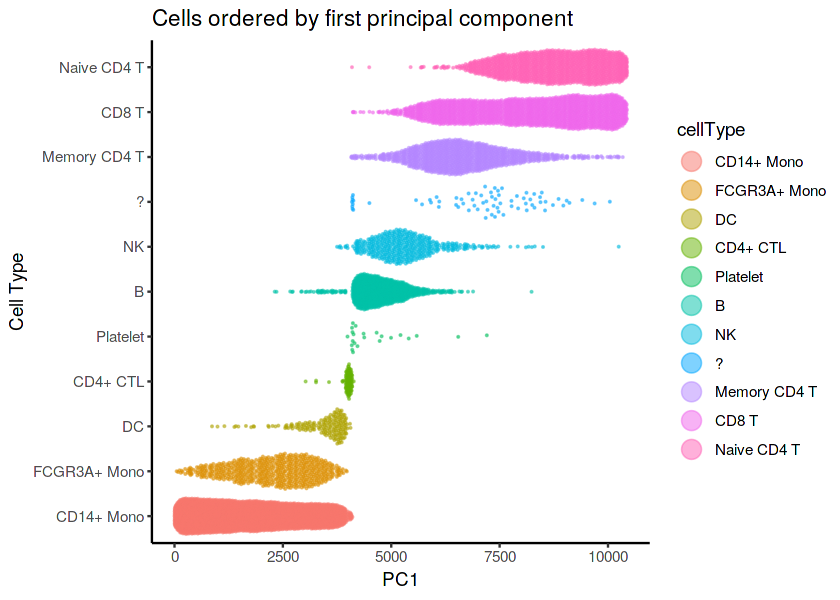

In [174]:
df2$pseudotime_PC1 <- rank(df2$PC_1) ## rank cells by their PC1 score

p1=ggplot( df2, aes(x = pseudotime_PC1, y = cellType, colour = cellType )) +
    geom_quasirandom(groupOnX = FALSE, size=0.1, alpha=0.5) + #ggbeeswarm包
    #scale_color_tableau() +  #ggthemes包
    theme_classic() + xlab("PC1") + ylab("Cell Type") +
    ggtitle("Cells ordered by first principal component")+
    guides( color = guide_legend( override.aes = list(size=5))) #放大图例

options(repr.plot.width=7, repr.plot.height=5)
p1

          0           5          15          10           9          16 
-20.4626399 -18.7474527 -13.2203131 -12.5230702 -11.5241802  -8.8533878 
         12          17          19          18           6           8 
 -0.9600688   6.3779091   7.4431193   8.6148042   9.1647393   9.6489767 
          7          14           3           4          13           1 
 10.2429225  11.5420359  11.6934830  11.8116627  11.9319578  13.2626868 
         11           2 
 13.3097880  13.4354084 


[1] "0"  "5"  "15" "10" "9"  "16" "12" "17" "19" "18" "6"  "8"  "7"  "14" "3" 
[16] "4"  "13" "1"  "11" "2"

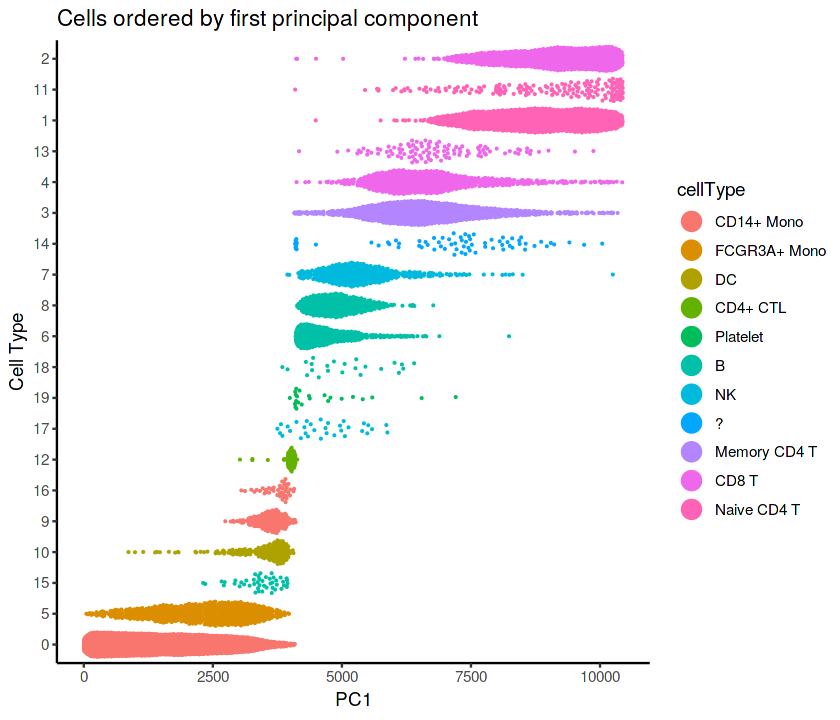

In [182]:
# reorder
orders=sapply(split(df$PC_1, df$seurat_clusters), mean)
orders=orders[order(orders)]
print(orders)
names(orders)

df2$seurat_clusters=factor( as.character(df2$seurat_clusters), levels = names(orders) )

df2$pseudotime_PC1 <- rank(df2$PC_1) ## rank cells by their PC1 score

p1=ggplot( df2, aes(x = pseudotime_PC1, y = seurat_clusters, colour = cellType )) +
    geom_quasirandom(groupOnX = FALSE, size=0.1, alpha=1) + #ggbeeswarm包
    #scale_color_tableau() +  #ggthemes包
    theme_classic() + xlab("PC1") + ylab("Cell Type") +
    ggtitle("Cells ordered by first principal component")+
    guides( color = guide_legend( override.aes = list(size=5))) #放大图例

options(repr.plot.width=7, repr.plot.height=6)
p1

### Diffusion map

In [11]:
library(destiny)

In [12]:
sc_sub=subset(scRNA, downsample=40)
sc_sub

An object of class Seurat 
22860 features across 758 samples within 1 assay 
Active assay: RNA (22860 features)
 3 dimensional reductions calculated: pca, umap, tsne

In [13]:
# 用全部细胞 巨慢 10min还没结束
dm <- DiffusionMap( t(as.data.frame( sc_sub@assays$RNA@data )) ) #16:32 - 16:33
dm

DiffusionMap (20 Diffusion components and 758 observations)
eigenvalues:    num [1:20] 0.33 0.261 0.157 0.127 0.108 ...
eigenvectors:   num [1:758, 1:20] 0.04238 -0.00685 -0.01361 0.00431 -0.00351 ...
  ..colnames:   chr [1:20] "DC1" "DC2" "DC3" "DC4" ...
optimal_sigma:  num [1:758] 18.5 24.5 21.6 22 26.3 ...
distance:       chr "euclidean"

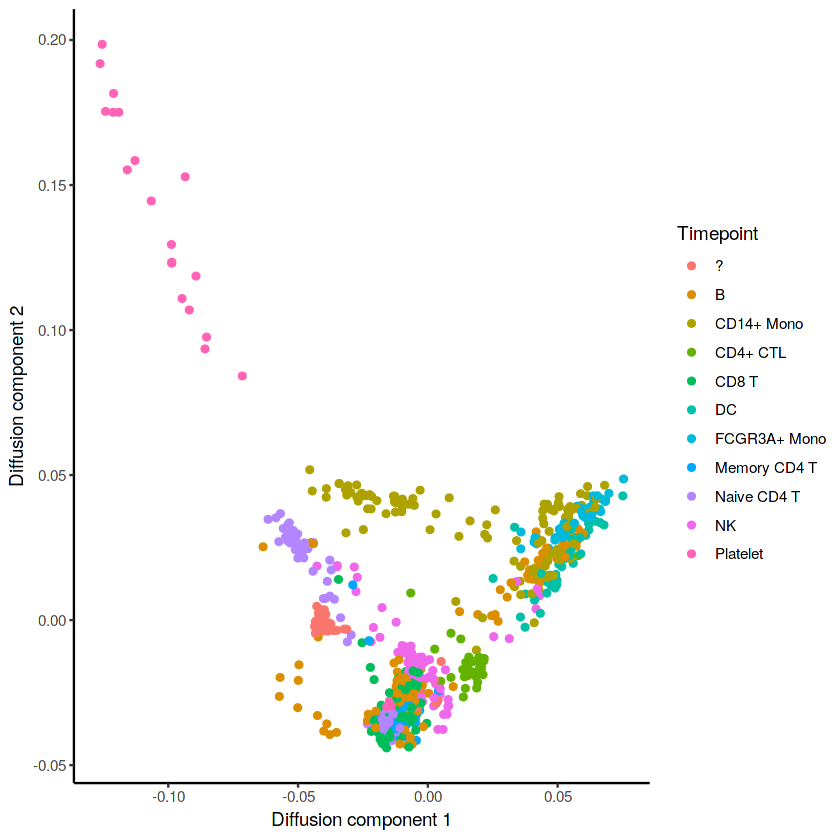

In [16]:
# Optional: Try different sigma values when making diffusion map.
# dm <- DiffusionMap(t(deng), sigma = "local")  # use local option to set sigma
# sigmas <- find_sigmas(t(deng), verbose = FALSE)  # find optimal sigma
# dm <- DiffusionMap(t(deng), sigma = optimal_sigma(sigmas))  

# Plot diffusion component 1 vs diffusion component 2 (DC1 vs DC2). 
tmp <- data.frame(DC1 = eigenvectors(dm)[, 1],
                  DC2 = eigenvectors(dm)[, 2],
                  Timepoint = sc_sub@meta.data$cellType)
ggplot(tmp, aes(x = DC1, y = DC2, colour = Timepoint)) +
    geom_point() + #scale_color_tableau() + 
    xlab("Diffusion component 1") + 
    ylab("Diffusion component 2") +
    theme_classic()

> 每一个DC基本对应着一个细胞类型

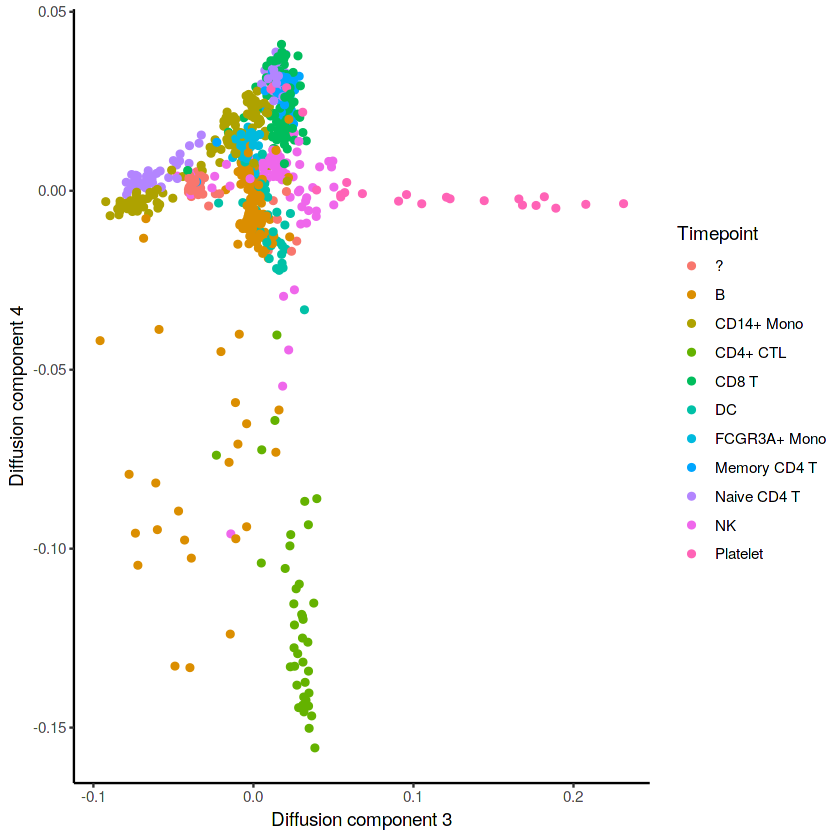

In [17]:
# Try plotting higher diffusion components against one another.
tmp <- data.frame(DC3 = eigenvectors(dm)[, 3],
                  DC4 = eigenvectors(dm)[, 4],
                  Timepoint = sc_sub@meta.data$cellType)
ggplot(tmp, aes(x = DC3, y = DC4, colour = Timepoint)) +
    geom_point() + #scale_color_tableau() + 
    xlab("Diffusion component 3") + 
    ylab("Diffusion component 4") +
    theme_classic()

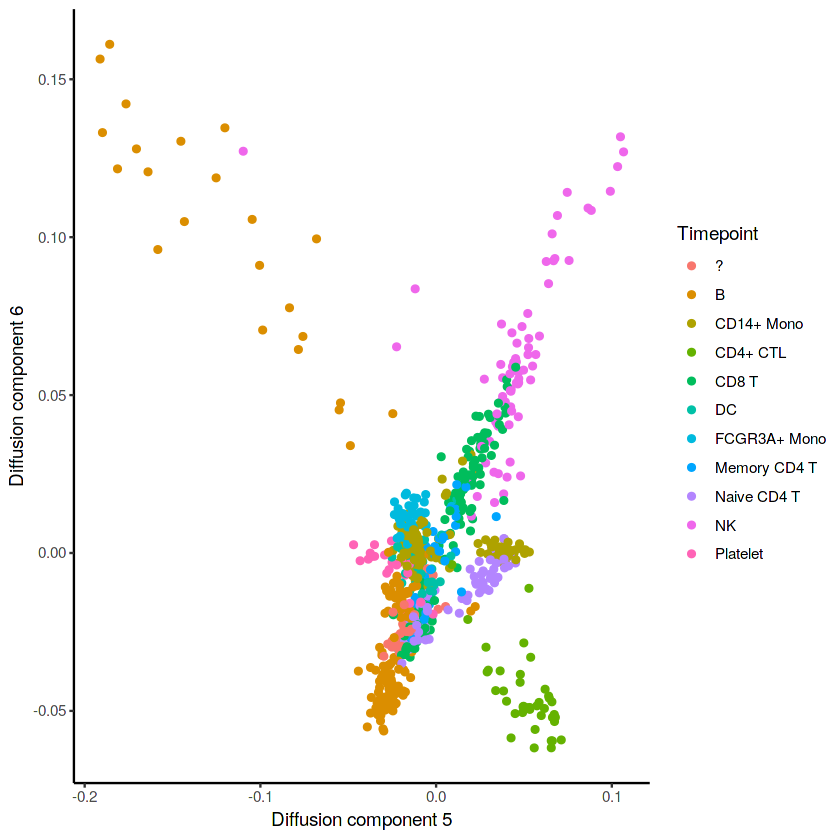

In [19]:
tmp <- data.frame(DC5 = eigenvectors(dm)[, 5],
                  DC6 = eigenvectors(dm)[, 6],
                  Timepoint = sc_sub@meta.data$cellType)
ggplot(tmp, aes(x = DC5, y = DC6, colour = Timepoint)) +
    geom_point() + #scale_color_tableau() + 
    xlab("Diffusion component 5") + 
    ylab("Diffusion component 6") +
    theme_classic()

## MeanHeatmap

[1] 52 20

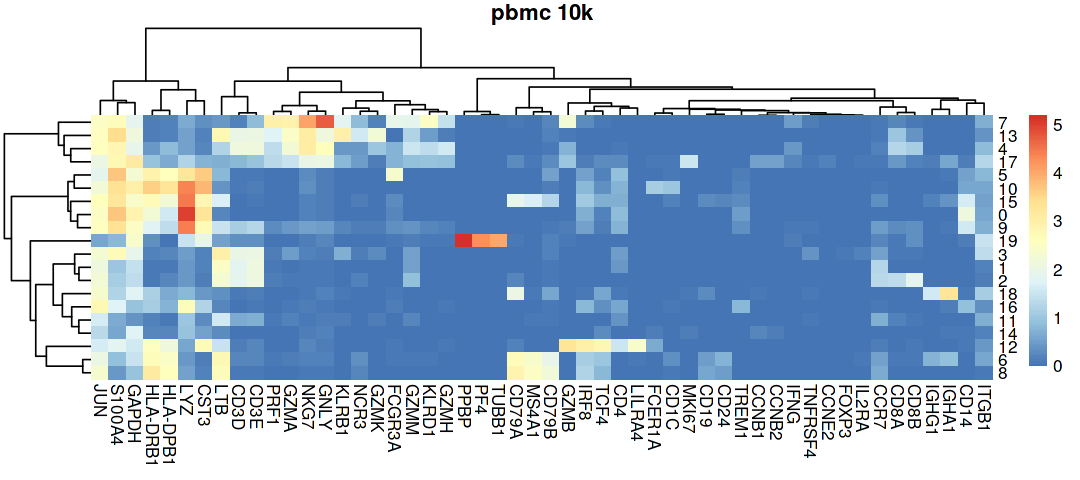

In [168]:
# Get expression of each clusters
getGeneClusterMeans <- function(object, genes, split.by=NULL){
    if( is.null(split.by) ){
        split.by="seurat_clusters";
    }
    mat <- as.data.frame( t( object@assays$RNA@data[genes,] ) ) #1. mat
    groups=object@meta.data[[split.by]] #2. groups
    as.data.frame( sapply( split( mat, groups), function(x){  apply( x, 2, mean) }) ) #3.mean of each cluster for each gene.
}

genes=c("CD3D","CD4","CD8A","CD79A")
df1=getGeneClusterMeans(scRNA, genelist.byHand)
dim(df1)

options(repr.plot.width=9, repr.plot.height=4)

library(pheatmap)
pheatmap(t(df1), border_color = NA, #scale="column", 
         clustering_method="ward.D2",
         main="pbmc 10k")

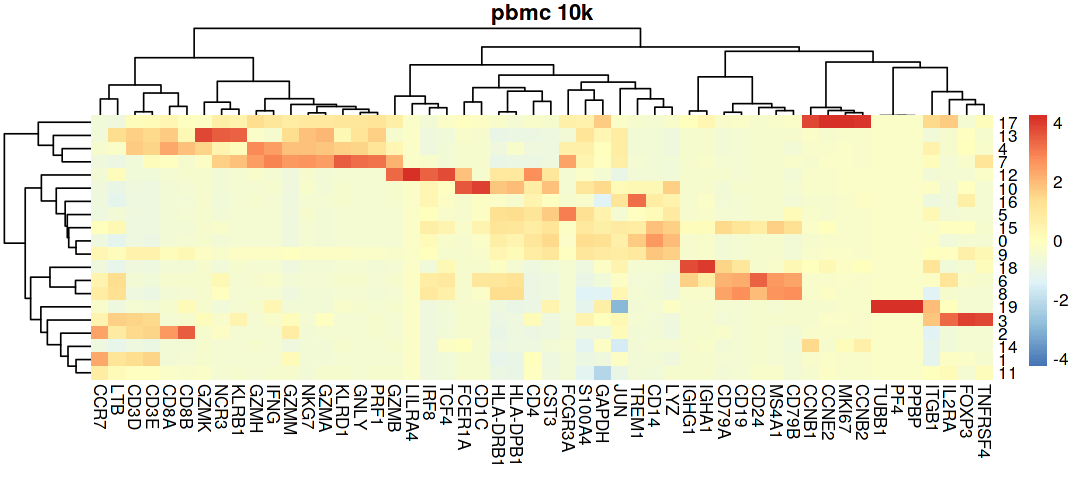

In [169]:
pheatmap(t(df1), border_color = NA, scale="column", 
         clustering_method="ward.D2",
         main="pbmc 10k")

[1] 52 11

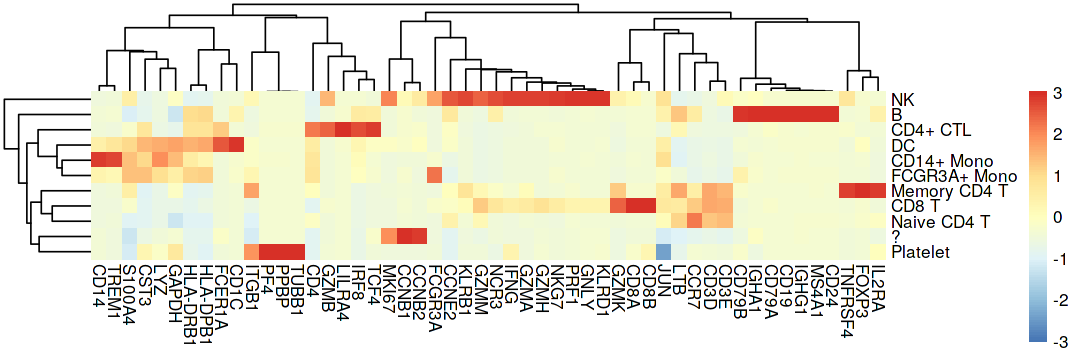

In [163]:
# change another label
genes=c("CD3D","CD4","CD8A","CD79A")
df1=getGeneClusterMeans(scRNA, genelist.byHand, "cellType")
dim(df1)

options(repr.plot.width=9, repr.plot.height=3)

library(pheatmap)
pheatmap(t(df1), border_color = NA, scale="column")

## correlation map

In [170]:
# 计算每个类中基因的mean exp
av.exp <- AverageExpression(scRNA)$RNA
dim(av.exp)

Finished averaging RNA for cluster 0

Finished averaging RNA for cluster 1

Finished averaging RNA for cluster 2

Finished averaging RNA for cluster 3

Finished averaging RNA for cluster 4

Finished averaging RNA for cluster 5

Finished averaging RNA for cluster 6

Finished averaging RNA for cluster 7

Finished averaging RNA for cluster 8

Finished averaging RNA for cluster 9

Finished averaging RNA for cluster 10

Finished averaging RNA for cluster 11

Finished averaging RNA for cluster 12

Finished averaging RNA for cluster 13

Finished averaging RNA for cluster 14

Finished averaging RNA for cluster 15

Finished averaging RNA for cluster 16

Finished averaging RNA for cluster 17

Finished averaging RNA for cluster 18

Finished averaging RNA for cluster 19



[1] 22860    20

In [175]:
av.exp[25:30,1:5]

0           1           2           3           4          
LINC01342  0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
TTLL10-AS1 0.000000000 0.000000000 0.000000000 0.000498485 0.002346109
TTLL10     0.001267963 0.001027618 0.003590060 0.006520138 0.004887085
TNFRSF18   0.002099386 0.001675492 0.002722594 0.406805116 0.046822411
TNFRSF4    0.005361783 0.011707130 0.009232723 0.791383578 0.028945921
SDF4       0.567167483 0.383009780 0.398049589 0.598219287 0.643298442

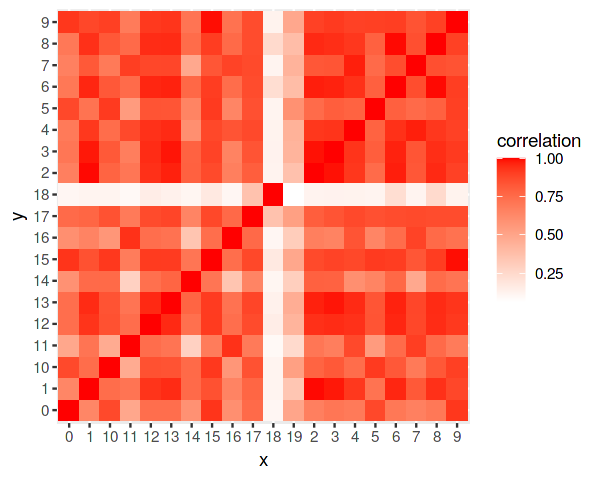

In [189]:
#av.exp <- AverageExpression(pbmc_small)$RNA
cor.exp <- as.data.frame(cor(av.exp))
cor.exp$x <- rownames(cor.exp)
cor.df <- tidyr::gather(data = cor.exp, y, correlation, 1:19)

options(repr.plot.width=5, repr.plot.height=4)
ggplot(cor.df, aes(x, y, fill = correlation)) +
  scale_fill_gradient(low="white",high='red')+
  geom_tile()

In [179]:
head(cor.df)

19        x y correlation
1 0.5005600 0 0 1.0000000  
2 0.3434052 1 0 0.6397641  
3 0.3657231 2 0 0.6693076  
4 0.4298569 3 0 0.7089489  
5 0.4410744 4 0 0.6914653  
6 0.5931475 5 0 0.8768238

In [183]:
# empty matrix
cor.mat=matrix(rep(0, nrow(cor.df)), nrow=dim(table(cor.df$y)))
dim(cor.mat) 

[1] 19 20

In [184]:
pheatmap(cor.mat)

ERROR: Error in cut.default(x, breaks = breaks, include.lowest = T): 'breaks' are not unique
